# Mengimpor Library
Pada tahap ini, kita mengimpor seluruh library yang diperlukan, seperti numpy, pandas, seaborn, matplotlib, dan sklearn.

In [1]:
import textwrap
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, RobustScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

Download dataset

In [2]:
!kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset
!kaggle datasets download caymansmith/sleep-health-and-lifestyle-data-set-part-2

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 4.64MB/s]
Dataset URL: https://www.kaggle.com/datasets/caymansmith/sleep-health-and-lifestyle-data-set-part-2
License(s): CC0-1.0
  0% 0.00/1.60k [00:00<?, ?B/s]
100% 1.60k/1.60k [00:00<00:00, 3.58MB/s]


In [3]:
!unzip /content/sleep-health-and-lifestyle-dataset.zip
!unzip /content/sleep-health-and-lifestyle-data-set-part-2.zip

Archive:  /content/sleep-health-and-lifestyle-dataset.zip
  inflating: Sleep_health_and_lifestyle_dataset.csv  
Archive:  /content/sleep-health-and-lifestyle-data-set-part-2.zip
  inflating: Sleep_health_and_lifestyle_dataset_part_2.csv  


Menggabungkan dataset pertama dan kedua

In [4]:
data1 = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
data2 = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset_part_2.csv")

# Potong baris pertama dari data2
data2_cleaned = data2.iloc[1:]

# Gabungkan dataset
data = pd.concat([data1, data2_cleaned], ignore_index=True)

# Cek panjang dataset
print(f" Total Dataset {len(data)}")

 Total Dataset 559


Total dataset dalam proyek ini 559 data merupakan Kriteria wajib untuk submission ini

In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Berdasarkan info di atas kolom `Sleep Disorder` yang tidak kosong ialah 155 dan yang kosong 219

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    object 
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    int64  
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    object 
 9   Blood Pressure           186 non-null    object 
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
 12  Sleep Disorder           30 non-null     object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


Berdasarkan info di atas kolom `Sleep Disorder` yang tidak kosong ialah 30 dan yang kosong 156

# Deskripsi Variabel
## Arti Variabel
Berikut adalah arti dari variabel-variabel pada dataset tersebut.

| VARIABLE | PENJELASAN |
|----------|------------|
| Person ID | Pengenal unik untuk setiap individu dalam dataset |
| Gender | Jenis kelamin individu (Laki-laki/Perempuan) |
| Age | Usia individu dalam tahun |
| Occupation | Pekerjaan atau profesi individu |
| Sleep Duration (hours) | Jumlah jam tidur individu per hari |
| Quality of Sleep (scale: 1-10) | Penilaian subjektif kualitas tidur, dengan rentang dari 1 sampai 10 |
| Physical Activity Level (minutes/day) | Jumlah menit aktivitas fisik yang dilakukan individu setiap hari |
| Stress Level (scale: 1-10) | Penilaian subjektif tingkat stres yang dialami individu, dengan rentang dari 1 sampai 10 |
| BMI Category | Kategori Indeks Massa Tubuh individu (misalnya Kekurangan Berat Badan, Normal, Kelebihan Berat Badan) |
| Blood Pressure (systolic/diastolic) | Pengukuran tekanan darah, ditunjukkan dengan tekanan sistolik dibagi tekanan diastolik |
| Heart Rate (bpm) | Detak jantung individu saat beristirahat, dalam denyut per menit |
| Daily Steps | Jumlah langkah yang ditempuh individu per hari |
| Sleep Disorder | Keberadaan atau ketiadaan gangguan tidur (Tidak Ada, Insomnia, Sleep Apnea) |

## Memeriksa Tipe Variabel Beserta Jumlah

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                559 non-null    int64  
 1   Gender                   559 non-null    object 
 2   Age                      559 non-null    int64  
 3   Occupation               559 non-null    object 
 4   Sleep Duration           559 non-null    float64
 5   Quality of Sleep         559 non-null    int64  
 6   Physical Activity Level  559 non-null    int64  
 7   Stress Level             559 non-null    int64  
 8   BMI Category             559 non-null    object 
 9   Blood Pressure           559 non-null    object 
 10  Heart Rate               559 non-null    int64  
 11  Daily Steps              559 non-null    int64  
 12  Sleep Disorder           184 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 56.9+ KB


Dari info 12 variable tersebut memiliki 3 tipe data yaitu ```int64``` berjumlah 7, ```object``` berjumlah 5 dan ```float64``` berjumlah 1

## Menampilkan Ringkasan Statistik dari Data

In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,280.000000,39.987478,7.114132,7.271914,58.758497,5.463327,70.182469,6820.751342
std,161.513673,8.099616,0.742149,1.133293,19.961450,1.674711,3.875617,1528.814803
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,140.500000,33.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5500.000000
50%,280.000000,38.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,419.500000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,559.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Dari hasil tersebut, dapat disimpulkan bahwa responden memiliki rentang usia 27–59 tahun dengan durasi tidur 5,8–8,5 jam, kualitas tidur 4–9 (skala 1–10), tingkat aktivitas fisik 30–90 (skala 1–100), tingkat stres 3–8 (skala 1–10), detak jantung 65–86 bpm, dan langkah harian 3000–10000 langkah.

# Data Cleaning

## Memeriksa Nilai yang Kosong pada Data

In [ ]:
pd.DataFrame({'Nilai yang Kosong pada dataset':data.isnull().sum()})

,Nilai yang Kosong pada dataset
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


## Mengisi data yang kosong

In [ ]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')

# Periksa apakah masih ada missing values di kolom tersebut


In [ ]:
data['Sleep Disorder'].isnull().sum()

0

## Memeriksa apakah ada data yang duplikasi

In [ ]:
# Cek data duplikat berdasarkan kolom
duplicates = data[data.duplicated()]
print("Data duplikat:")
duplicates

# Check for duplicates based on specific columns (e.g., 'Person ID')
duplicates_person_id = data[data.duplicated(subset=['Person ID'])]
print("\nData duplikat berdasarkan Person ID :")
duplicates_person_id

# Number of duplicates
num_duplicates = len(duplicates)
print(f"\nTotal data duplikat per baris: {num_duplicates}")

Data duplikat:

Data duplikat berdasarkan Person ID :

Total data duplikat per baris: 0


In [ ]:
data[data.duplicated]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


Dari hasil di atas, tidak ada variabel yang memiliki nilai Duplikat atau nilai yang sama, maka kita akan melanjutkan proses nya

## Memisahkan Data Tekanan Darah menjadi Systolic dan Diastolic

In [ ]:
data = pd.concat([data, data['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
data = data.rename(columns={0: 'Systolic', 1: 'Diastolic'})

In [ ]:
data['Systolic'] = data['Systolic'].astype(float)
data['Diastolic'] = data['Diastolic'].astype(float)

## Dari kolom Kategori BMI terdapat 4 nilai yang unik antara nya ada 2 yang sama

In [ ]:
BMI_unique = data['BMI Category'].unique()
print(BMI_unique)

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [ ]:
data['BMI Category']=data['BMI Category'].replace({'Normal':'Normal Weight'})
data['BMI Category'].value_counts()

,count
BMI Category,
Normal Weight,377
Overweight,170
Obese,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                559 non-null    int64  
 1   Gender                   559 non-null    object 
 2   Age                      559 non-null    int64  
 3   Occupation               559 non-null    object 
 4   Sleep Duration           559 non-null    float64
 5   Quality of Sleep         559 non-null    int64  
 6   Physical Activity Level  559 non-null    int64  
 7   Stress Level             559 non-null    int64  
 8   BMI Category             559 non-null    object 
 9   Heart Rate               559 non-null    int64  
 10  Daily Steps              559 non-null    int64  
 11  Sleep Disorder           559 non-null    object 
 12  Systolic                 559 non-null    float64
 13  Diastolic                559 non-null    float64
dtypes: float64(3), int64(7), o

In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,280.000000,39.987478,7.114132,7.271914,58.758497,5.463327,70.182469,6820.751342,126.967800,83.459750
std,161.513673,8.099616,0.742149,1.133293,19.961450,1.674711,3.875617,1528.814803,7.540027,5.760271
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,140.500000,33.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5500.000000,120.000000,80.000000
50%,280.000000,38.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,128.000000,84.000000
75%,419.500000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000,130.000000,85.000000
max,559.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


# Visualisasi Data
Boxplot akan digunakan untuk menganalisis distribusi data pada setiap kolom.

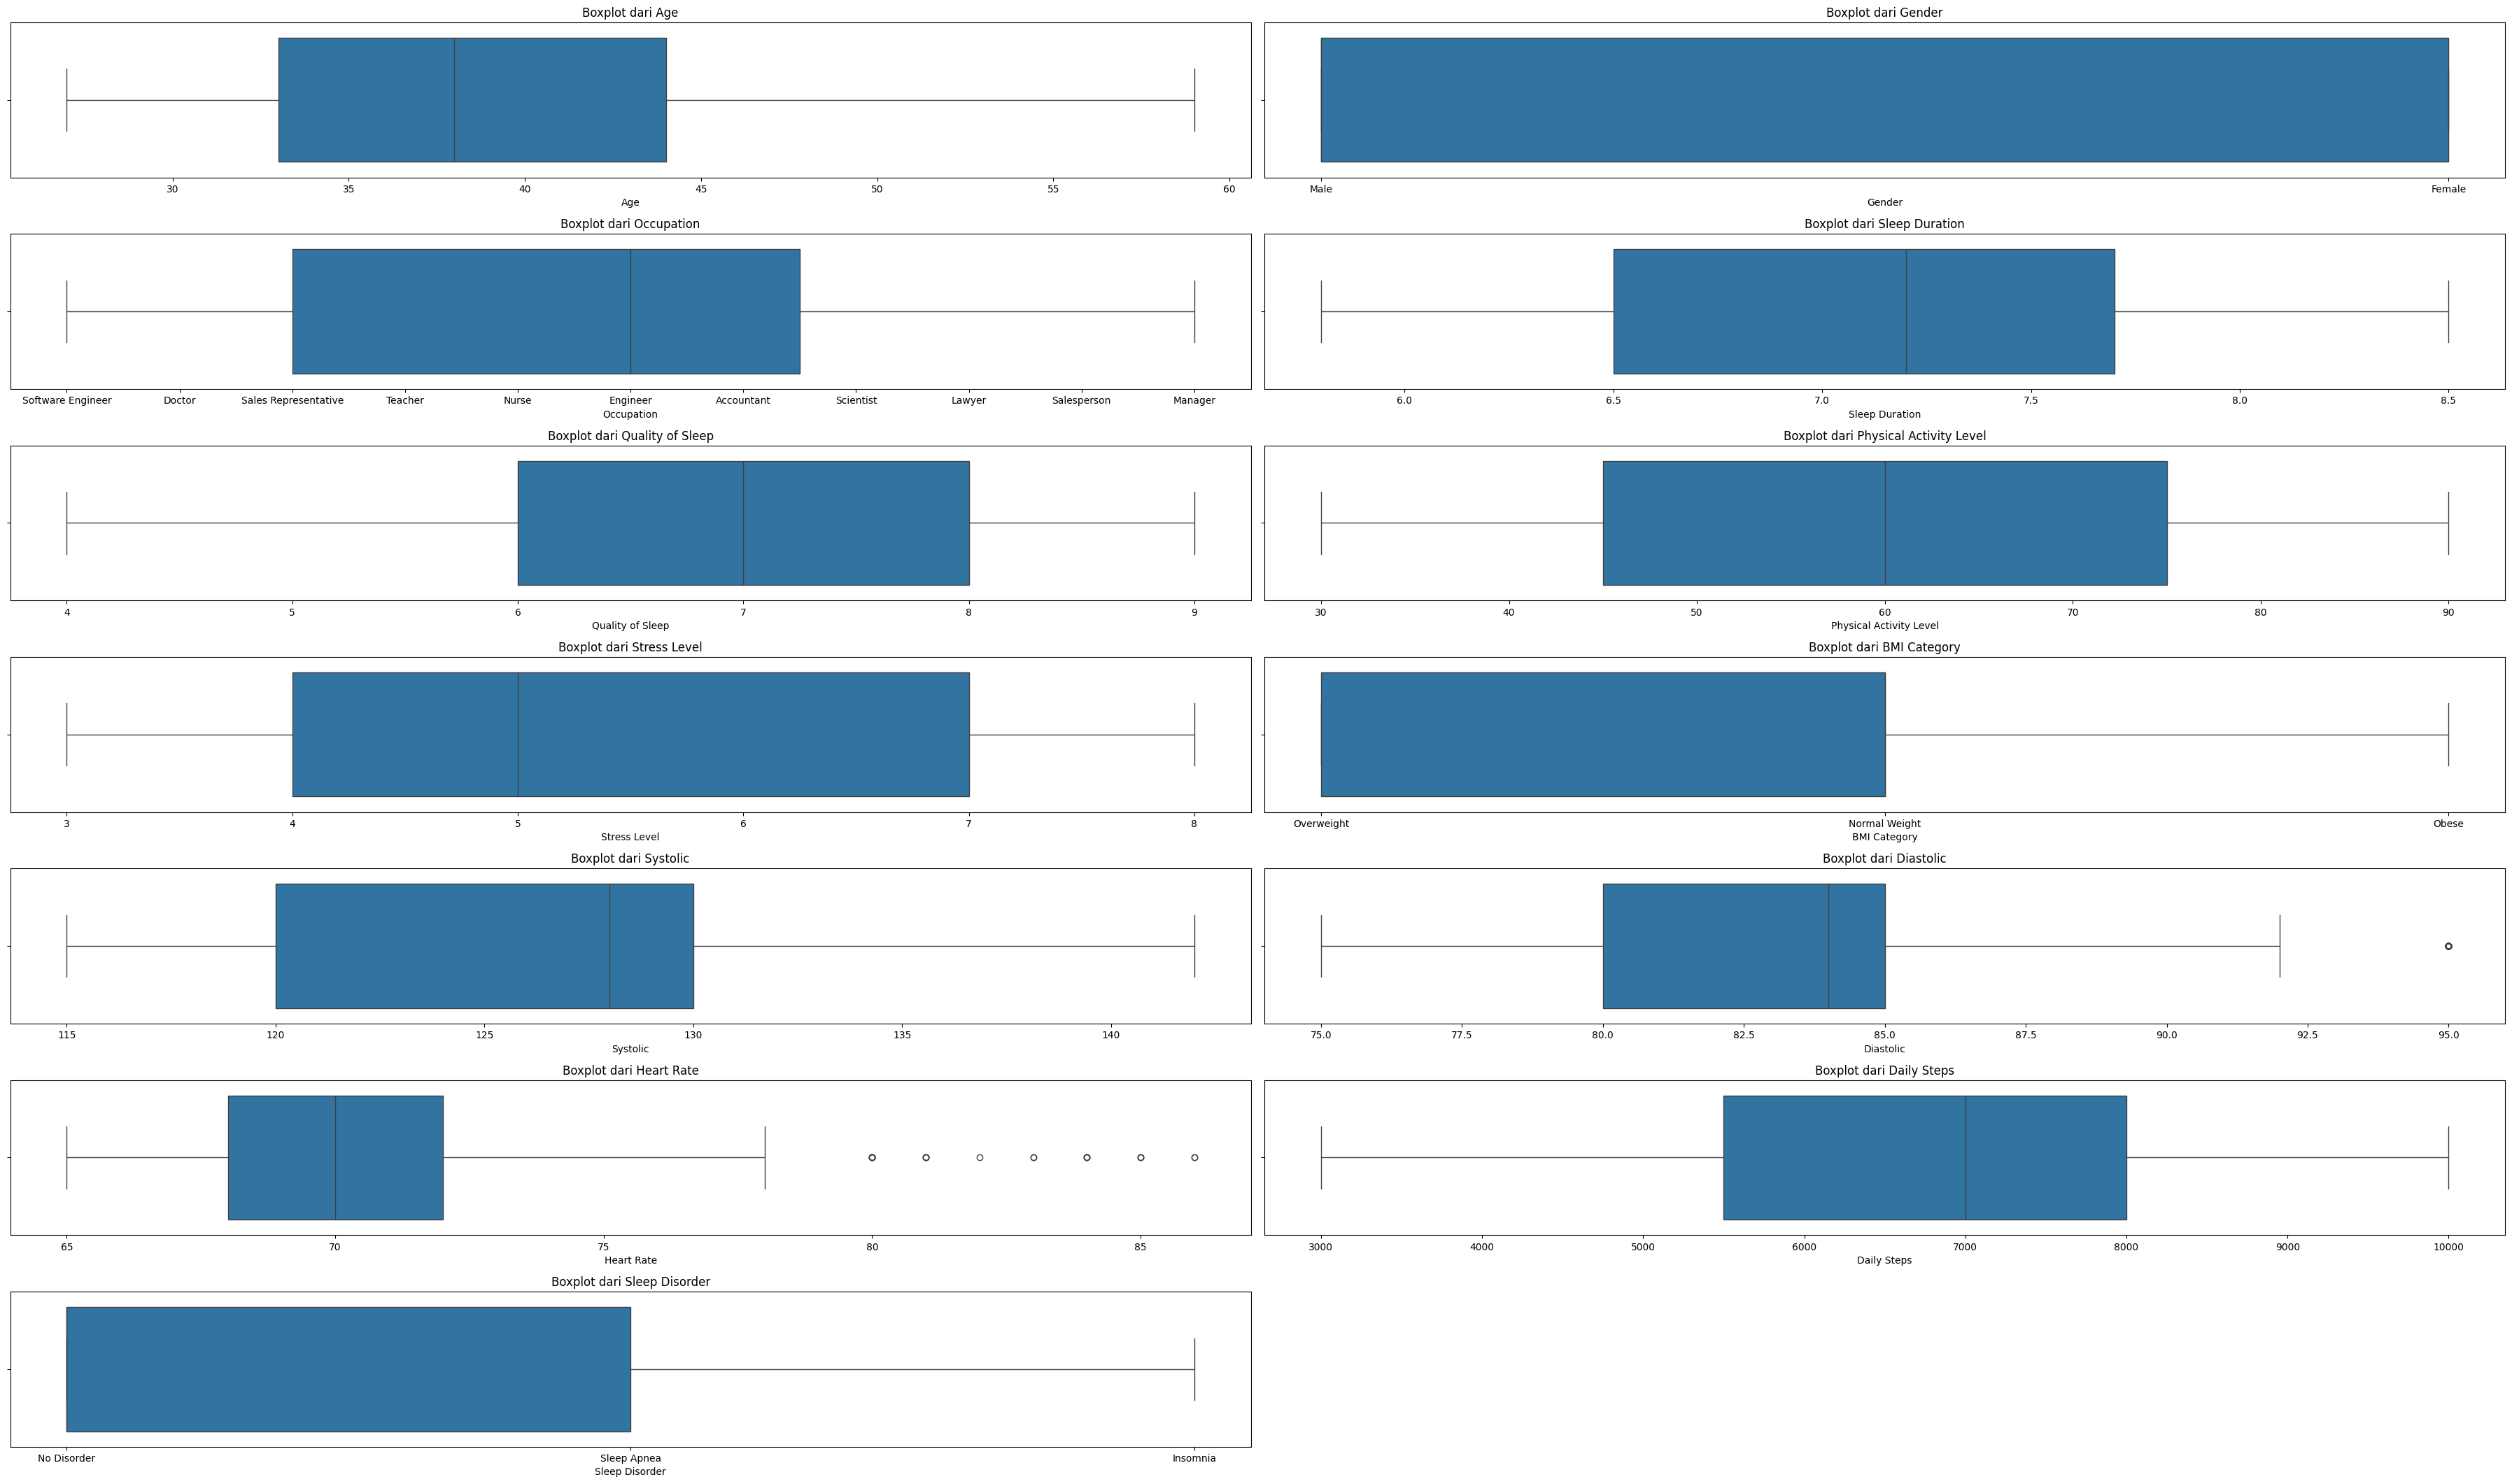

In [ ]:
# Menuliskan seluruh nama kolom numerikal
kolom_data = ["Age", "Gender", "Occupation", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "BMI Category", "Systolic", 'Diastolic', "Heart Rate", "Daily Steps", "Sleep Disorder"]

# Membentuk plot berukuran 24 x 12
plt.figure(figsize = (36, 36))

# Membentuk plot berisi 12 subplot, dengan setiap subplot merupakan boxplot
for i in range(len(kolom_data)):

    # Membentuk plot dengan subplot berukuran 6 x 2 (12 subplot)
    plt.subplot(12, 2, i + 1)
    sns.boxplot(x = data[kolom_data[i]])
    plt.title('Boxplot dari {}'.format(kolom_data[i]))
    plt.tight_layout()



**Berikut adalah interpretasi dari boxplot di atas.**
1. Berdasarkan Usia (Age):
- Mayoritas responden berada pada rentang usia 40-45 tahun.
- Terdapat beberapa outlier di usia yang lebih muda, sekitar 30 tahun, serta beberapa outlier di usia yang lebih tua, sekitar 55 tahun.
- Meskipun ada outlier, data ini tidak akan dihapus karena masih mungkin ada responden yang berusia 30 tahun maupun 55 tahun.

2. Berdasarkan Jenis Kelamin (Gender):
- Jumlah laki-laki dan perempuan relatif seimbang dalam data ini.

3. Berdasarkan Okupasi (Occupation):
- Mayoritas pekerjaan responden adalah Software Engineer, Dokter, Sales Representative, dan Engineer.
- Terdapat juga beberapa pekerjaan lain seperti Guru, Akuntan, dan Pengacara.

4. Berdasarkan Kualitas Tidur (Quality of Sleep):
- Kualitas tidur responden secara umum berada di level sedang.

5. Berdasarkan Tingkat Stres (Stress Level):
- Tingkat stres responden juga cenderung berada di level sedang.

6. Berdasarkan Tekanan Darah (Blood Pressure):
- Tekanan darah responden sebagian besar berada dalam kategori normal.

7. Berdasarkan Kategori BMI (BMI Category):
- Mayoritas responden memiliki berat badan normal.
- Namun, terdapat beberapa responden yang masuk kategori kelebihan berat badan.

8. Berdasarkan Detak Jantung (Heart Rate):
- Detak jantung sebagian besar responden berada di kisaran normal.

9. Berdasarkan Gangguan Tidur (Sleep Disorder):
- Sebagian besar responden tidak memiliki gangguan tidur.

Secara keseluruhan, profil responden dalam data ini menunjukkan karakteristik yang cukup sehat, dengan beberapa outlier pada beberapa aspek. Analisis lebih lanjut dapat dilakukan untuk memahami hubungan antar variabel dan pola yang mungkin ada.

# Univariate Analysis

Pertama, kita akan mengelompokkan variabel-variabel yang ada ke dalam 2 kategori, yaitu kategori numerik dan kategori kategorikal.

In [ ]:
# Membentuk list berisi kolom-kolom numerikal (data yang bertipe float64 dan int64), mengecualikan Person ID
kolom_numerikal = [nama_kolom for nama_kolom in data.columns if (data[nama_kolom].dtype == "float64" or data[nama_kolom].dtype == "int64") and nama_kolom != "Person ID"]

# Membentuk list berisi kolom-kolom kategorikal (data yang bertipe object)
kolom_kategorikal = [nama_kolom for nama_kolom in data.columns if data[nama_kolom].dtype == "object"]

# Menampilkan list kolom numerikal dan kolom kategorikal
print("Kolom-kolom numerikal: ", kolom_numerikal)
print("Kolom-kolom kategorikal: ", kolom_kategorikal)

Kolom-kolom numerikal:  ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']
Kolom-kolom kategorikal:  ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


In [ ]:
# Menghitung jumlah nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
jumlah_unik = data[kolom_kategorikal].nunique()

# Menampilkan nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
nilai_unik = data[kolom_kategorikal].apply(lambda x: x.unique())

# Menampilkan hasil dalam bentuk DataFrame
pd.DataFrame({"Total Nilai Berbeda": jumlah_unik, "Nilai-Nilai": nilai_unik})

,Total Nilai Berbeda,Nilai-Nilai
Gender,2,"[Male, Female]"
Occupation,11,"[Software Engineer, Doctor, Sales Representati..."
BMI Category,3,"[Overweight, Normal Weight, Obese]"
Sleep Disorder,3,"[No Disorder, Sleep Apnea, Insomnia]"


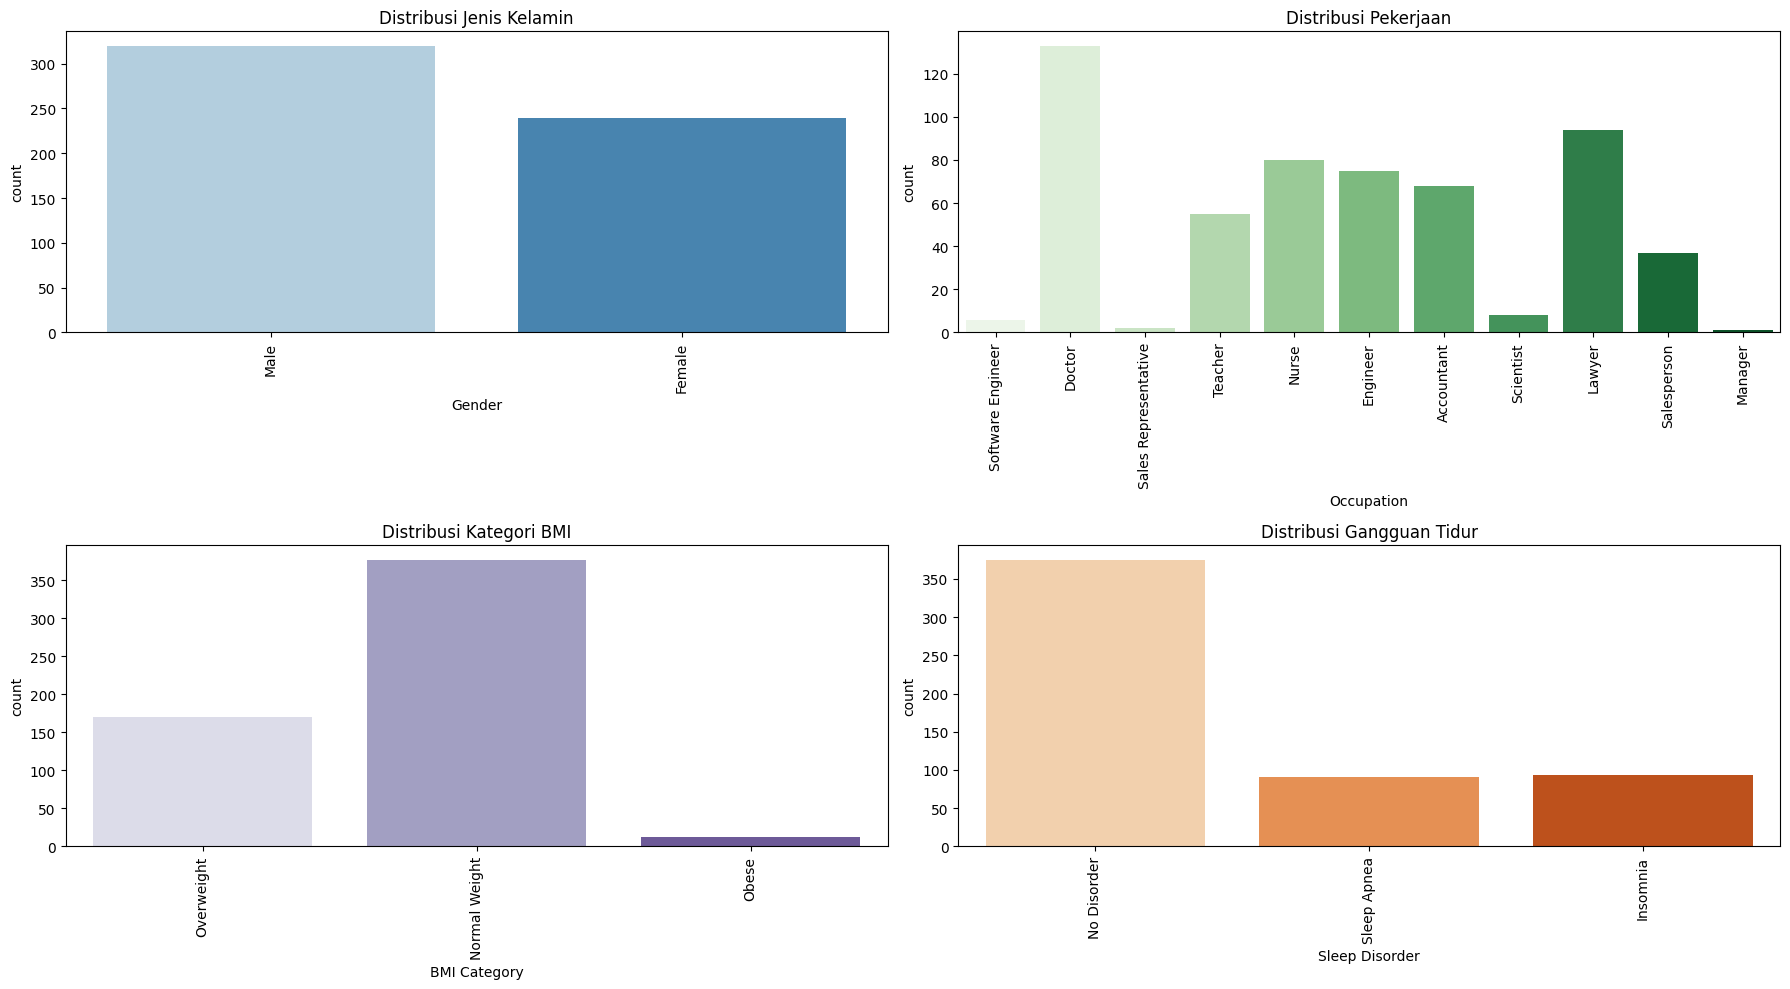

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

# Boxplot Berdasarkan Jenis Kelamin (Gender)
sns.countplot(x='Gender', data=data, ax=axes[0], hue='Gender', palette='Blues', legend=False)
axes[0].set_title('Distribusi Jenis Kelamin')
axes[0].tick_params(axis='x', rotation=90)

# Boxplot Berdasarkan Pekerjaan (Occupation)
sns.countplot(x='Occupation', data=data, ax=axes[1], hue='Occupation', palette='Greens', legend=False)
axes[1].set_title('Distribusi Pekerjaan')
axes[1].tick_params(axis='x', rotation=90)

# Boxplot Berdasarkan Kategori BMI
sns.countplot(x='BMI Category', data=data, ax=axes[2], hue='BMI Category', palette='Purples', legend=False)
axes[2].set_title('Distribusi Kategori BMI')
axes[2].tick_params(axis='x', rotation=90)

# Boxplot Berdasarkan Gangguan Tidur (Sleep Disorder)
sns.countplot(x='Sleep Disorder', data=data, ax=axes[3], hue='Sleep Disorder', palette='Oranges', legend=False)
axes[3].set_title('Distribusi Gangguan Tidur')
axes[3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Interpretasi dari gambar berikut:

1. **Distribusi Jenis Kelamin**  
   Plot menunjukkan bahwa jumlah responden pria dan wanita hampir sama, dengan distribusi yang seimbang antara keduanya.

2. **Distribusi Pekerjaan**  
   Mayoritas responden berasal dari profesi guru dan perawat, sementara profesi seperti manajer dan ilmuwan memiliki jumlah responden paling sedikit.

3. **Distribusi Kategori BMI**  
   Sebagian besar responden berada dalam kategori **Normal** BMI, diikuti oleh kategori **Overweight**. Kategori **Obese** dan **Normal Weight** memiliki jumlah responden yang jauh lebih kecil.

4. **Distribusi Gangguan Tidur**  
   Mayoritas responden tidak memiliki gangguan tidur (**None**), sedangkan gangguan tidur seperti **Sleep Apnea** dan **Insomnia** memiliki jumlah responden yang lebih sedikit, dengan distribusi hampir sama di antara keduanya.


Selanjutnya, kita akan melihat lebih detail mengenai jumlah dari masing-masing tingkat gangguan tidur untuk mengetahui jumlah secara umum.

In [ ]:
gangguan_tidur = data['Sleep Disorder'].value_counts()
gangguan_tidur

,count
Sleep Disorder,
No Disorder,375
Insomnia,93
Sleep Apnea,91


Secara total, dapat dilihat bahwa responden yang mengalami Gangguan tidur berjumlah 155 orang dari 374 orang.

Selanjutnya, akan dibuat pie chart untuk melihat persebaran data dari masing-masing responden yang memiliki dan tidak memiliki Gangguan tidur.

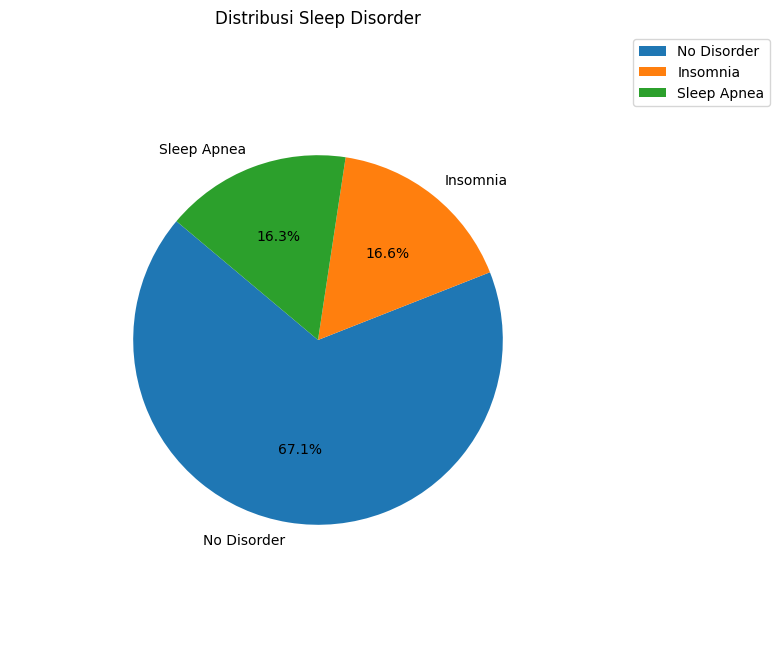

In [ ]:
# Membuat variabel label dan size
label = gangguan_tidur.index.tolist()
size = gangguan_tidur.values.tolist()

# Membentuk pie chart untuk melihat persebaran data dari masing-masing Sleep Disorder
plt.figure(figsize = (8, 8))
plt.pie(size, labels = label, autopct = "%1.1f%%", startangle = 140, radius = 0.75)

# Menambahkan legend pada pie chart
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Menambahkan judul pada plot
plt.title("Distribusi Sleep Disorder")

# Menampilkan plot
plt.show()

Dari gambar di atas, total responden yang mengalami Insomnia berjumlah $20.6\%$, Sleep Apnea $20.9\%$ dan yang tidak mengalami gangguan tidur $58.6\%$.

Selanjutnya, kita akan membuat histogram untuk variabel-variabel numerik guna mengamati distribusi datanya.

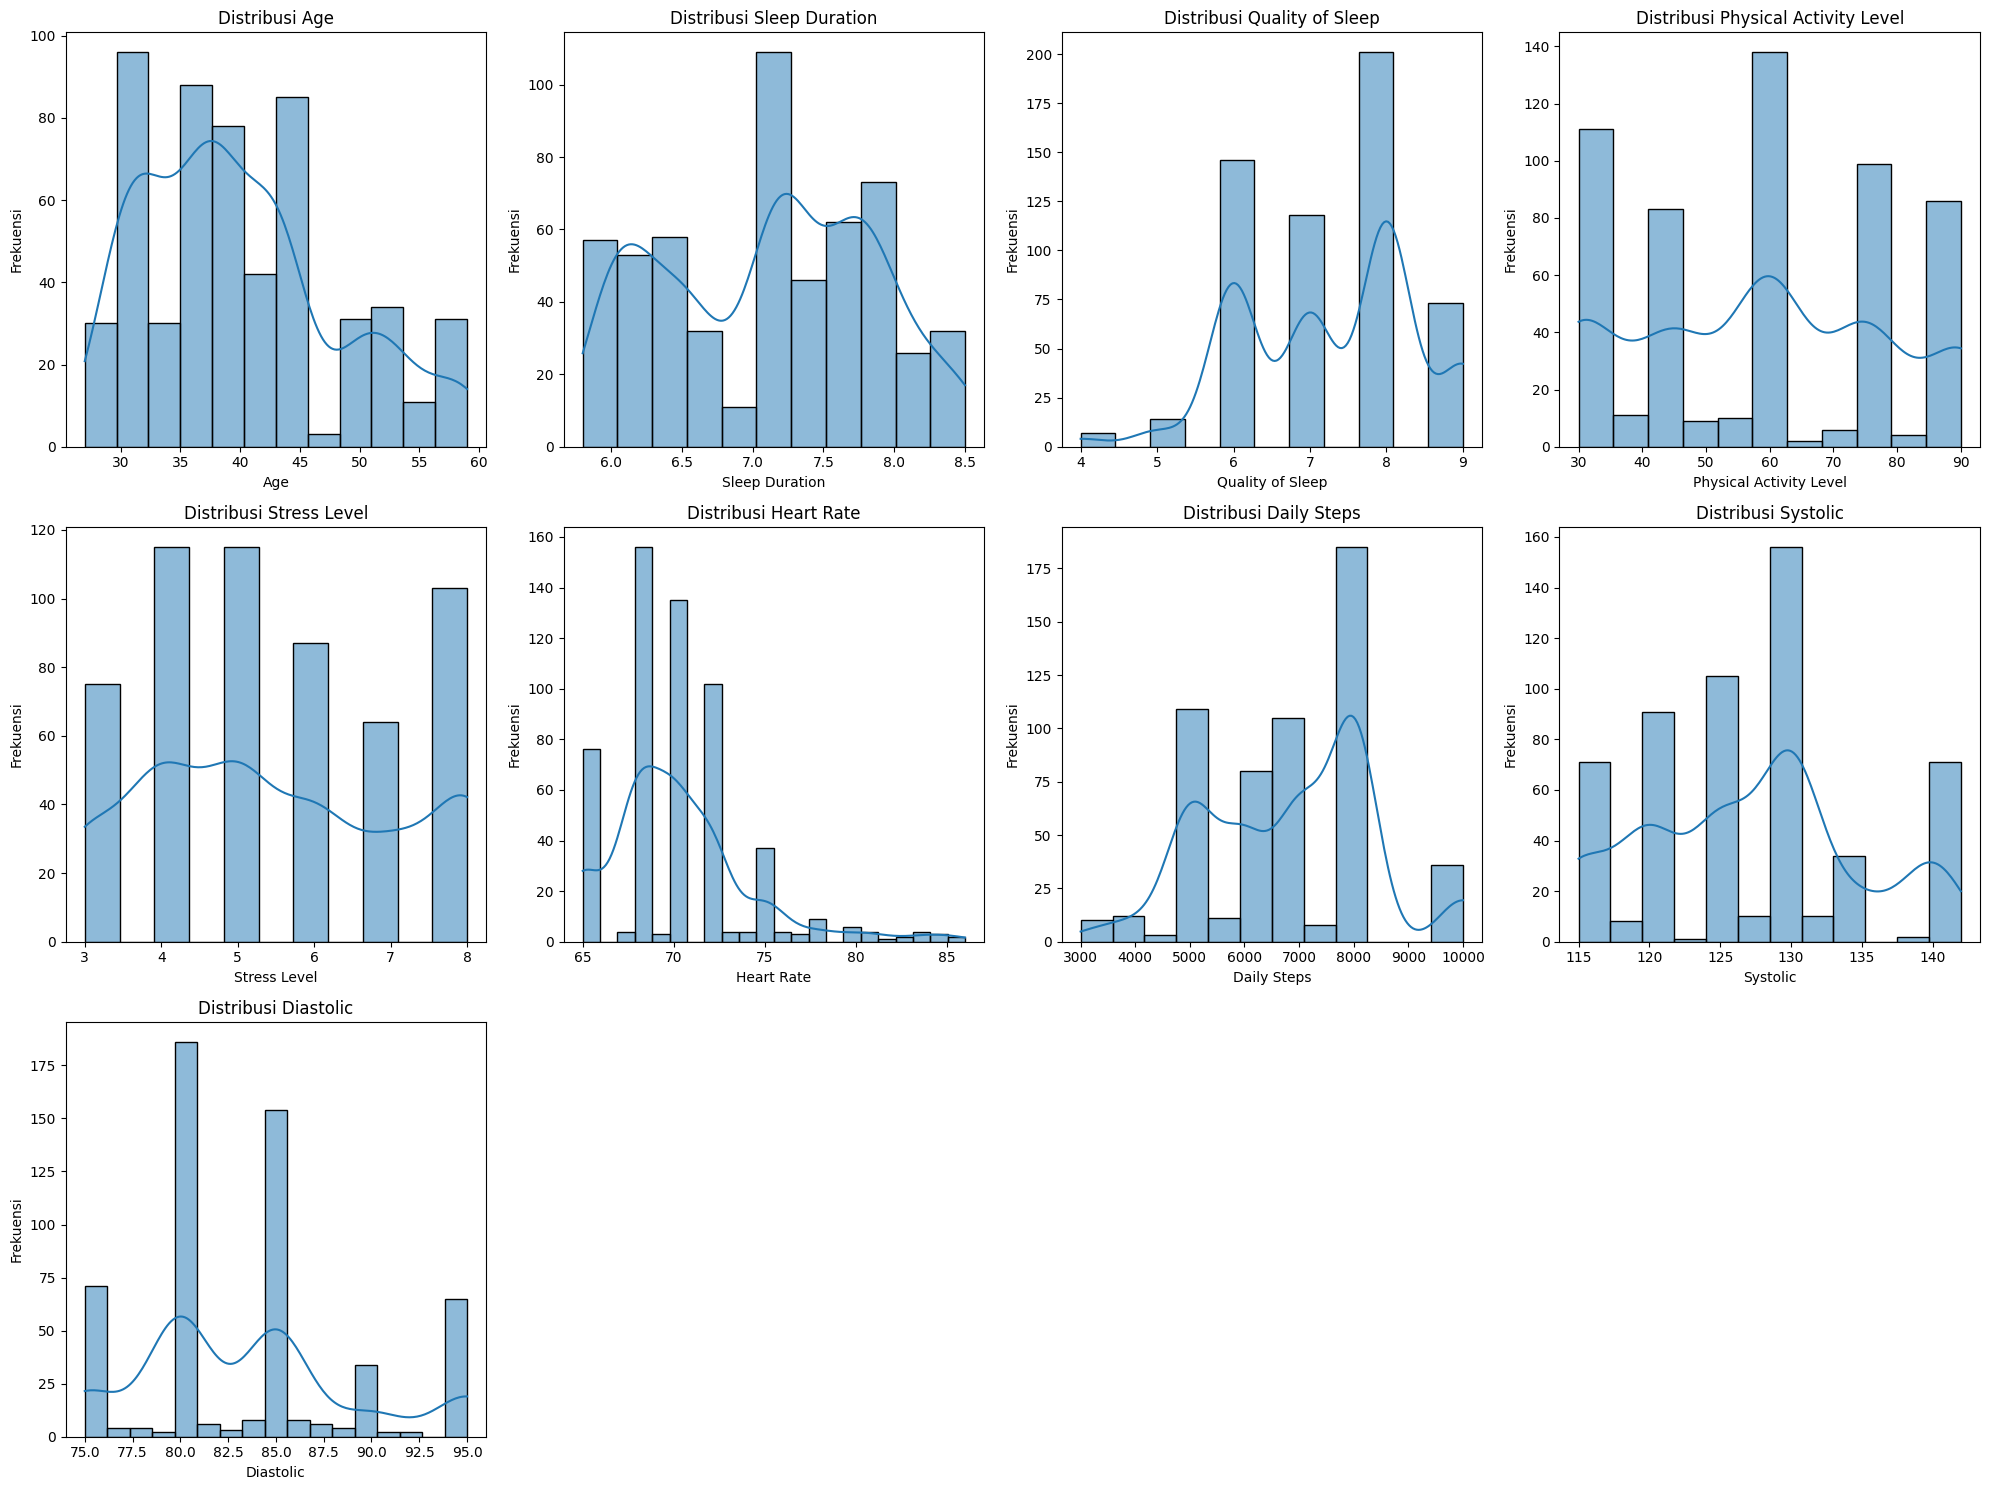

In [ ]:
# Visualisasi Distribusi
plt.figure(figsize=(20, 15))
for i, col in enumerate(kolom_numerikal, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Berikut interpretasi dari histogram sebagai berikut:

1. **Distribusi Usia**

    Data usia menunjukkan persebaran yang merata dengan puncak di usia 40-45 tahun. Responden yang lebih muda (sekitar 30 tahun) dan yang lebih tua (di atas 55 tahun) memiliki jumlah lebih sedikit.

2. **Distribusi Durasi Tidur**
    
    Durasi tidur responden cenderung berkisar antara 6 hingga 8 jam, dengan puncak frekuensi di sekitar 7 jam. Durasi tidur di bawah 6 jam atau di atas 8 jam jarang ditemukan.

3. **Distribusi Kualitas Tidur**
    
    Sebagian besar responden memiliki skor kualitas tidur yang tinggi, yaitu antara 6 hingga 9. Sangat sedikit yang memiliki kualitas tidur dengan skor di bawah 5.

4. **Distribusi Aktivitas Fisik**
    
    Aktivitas fisik (dalam menit) menunjukkan persebaran yang hampir seragam, dengan sedikit puncak di sekitar 30 menit dan 70-80 menit.

5. **Distribusi Tingkat Stres**
    
    Tingkat stres responden cukup merata, dengan sedikit puncak di skor 8. Tingkat stres yang sangat rendah (di bawah skor 3) jarang terjadi.

6. **Distribusi Detak Jantung**
    
    Sebagian besar responden memiliki detak jantung yang berkisar antara 65-75 detak per menit. Detak jantung di atas 80 cenderung jarang terjadi.

7. **Distribusi Langkah Harian**

    Sebagian besar responden memiliki langkah harian di rentang 6.000 hingga 8.000 langkah, dengan sedikit puncak di sekitar 7.000 langkah. Langkah di bawah 3.000 atau di atas 9.000 jarang ditemukan.

# Multivariate Analysis

## Kategorical

### 1. Perbandingan Kategori BMI dan Gangguan tidur

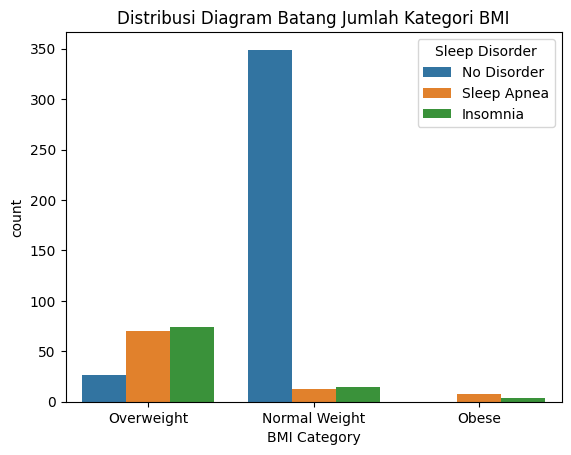

In [ ]:
fig = sns.countplot(data=data, x='BMI Category', hue='Sleep Disorder')
fig.set_title('Distribusi Diagram Batang Jumlah Kategori BMI')
plt.show()

### 2. Perbandingan Distribusi Pekerjaan dan Gangguan Tidur

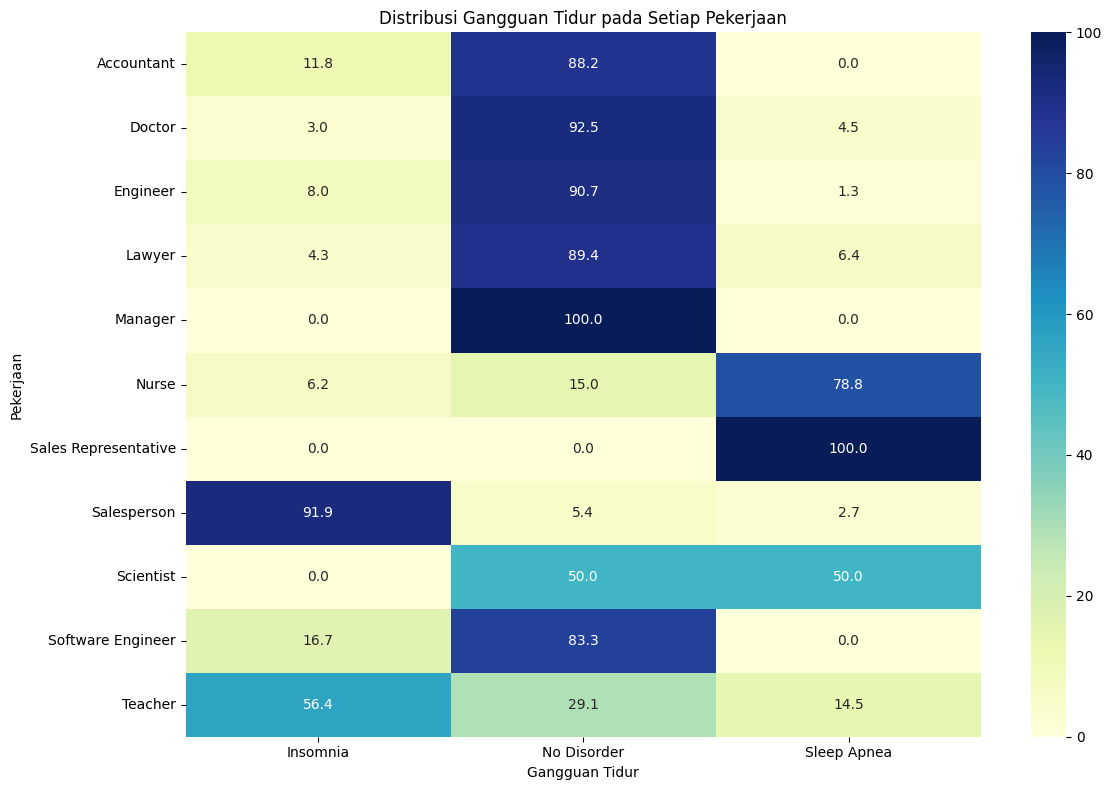

In [ ]:
plt.figure(figsize=(12,8))
crosstab = pd.crosstab(data['Occupation'], data['Sleep Disorder'], normalize='index') * 100
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Distribusi Gangguan Tidur pada Setiap Pekerjaan')
plt.xlabel('Gangguan Tidur')
plt.ylabel('Pekerjaan')
plt.tight_layout()
plt.show()

### 3. Perbandingan Distribusi Jenis Kelamin dan Gangguan Tidur

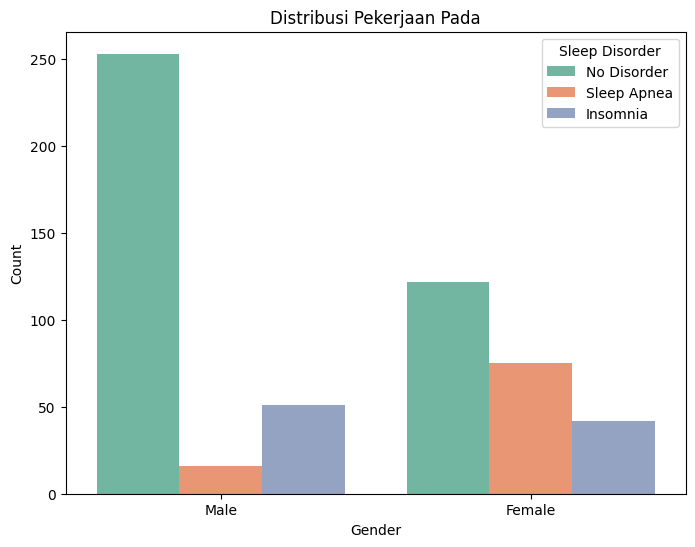

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Sleep Disorder', data=data, palette='Set2')
plt.title('Distribusi Pekerjaan Pada')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Berdasarkan gambar, dapat diberikan interpretasi sebagai berikut:

1. Distribusi Gangguan Tidur Berdasarkan Jenis Kelamin
Laki-laki memiliki proporsi yang jauh lebih tinggi pada kategori `No Disoder` dibandingkan perempuan, mengindikasikan kondisi kesehatan tidur yang lebih baik di kalangan laki-laki. Perempuan memiliki tingkat gangguan tidur yang lebih tinggi, dengan Apnea Tidur sebagai kondisi yang paling dominan.

2. Perbandingan antara Jenis Kelamin
Kategori `No Disoder` menjadi kelompok dominan pada kedua jenis kelamin, namun jumlahnya jauh lebih tinggi pada laki-laki. Apnea Tidur dan Insomnia lebih umum terjadi pada perempuan.

3. Observasi Keseluruhan
Distribusi gangguan tidur menunjukkan perbedaan yang jelas berdasarkan jenis kelamin, di mana perempuan memiliki tingkat gangguan tidur yang lebih tinggi. Data ini menyiratkan bahwa jenis kelamin dapat menjadi faktor penting, dan penelitian lebih lanjut diperlukan untuk memahami penyebab dan implikasi perbedaan ini.

### 4. Variasi Distribusi Tekanan Darah, Usia, Jenis Kelamin dan Berat badan

<Figure size 2000x1000 with 0 Axes>

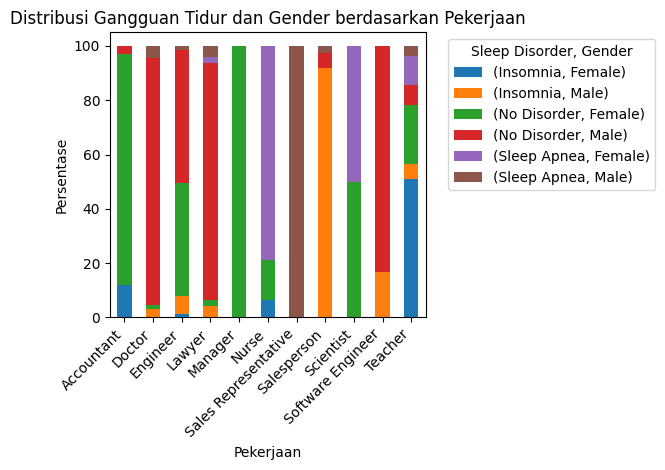

In [ ]:
plt.figure(figsize=(20,10))
data_crosstab = pd.crosstab(data['Occupation'], [data['Sleep Disorder'], data['Gender']], normalize='index') * 100
data_crosstab.plot(kind='bar', stacked=True, rot=45)
plt.title('Distribusi Gangguan Tidur dan Gender berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Persentase')
plt.legend(title='Sleep Disorder, Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

## Numerikal

### 1. Distribusi perbandingan Gangguan tidur dan sistolik, Diastolik

#### A. Distribusi Kepadatan Systolic berdasarkan Gangguan Tidur

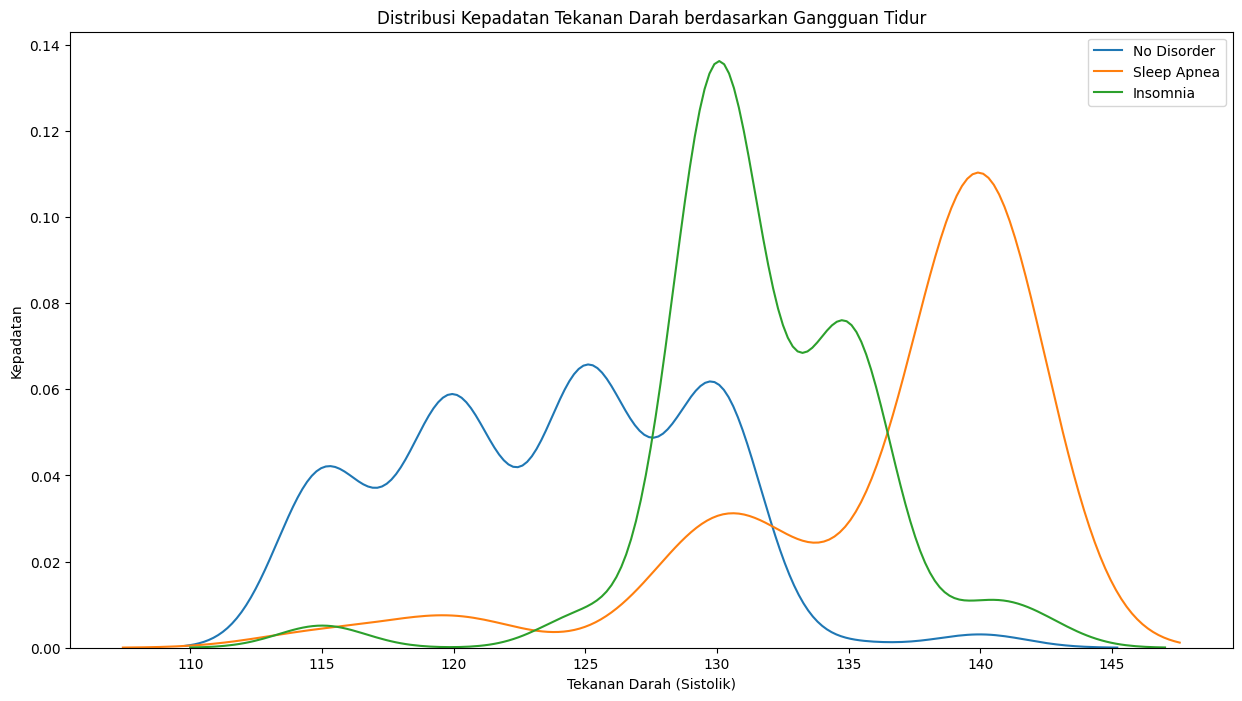

In [ ]:
plt.figure(figsize=(15,8))


for disorder in data['Sleep Disorder'].unique():
    subset = data[data['Sleep Disorder'] == disorder]
    sns.kdeplot(data=subset, x='Systolic', label=disorder)

plt.title('Distribusi Kepadatan Tekanan Darah berdasarkan Gangguan Tidur')
plt.xlabel('Tekanan Darah (Sistolik)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

#### B. Distribusi violinplot Systolic berdasarkan Gangguan Tidur

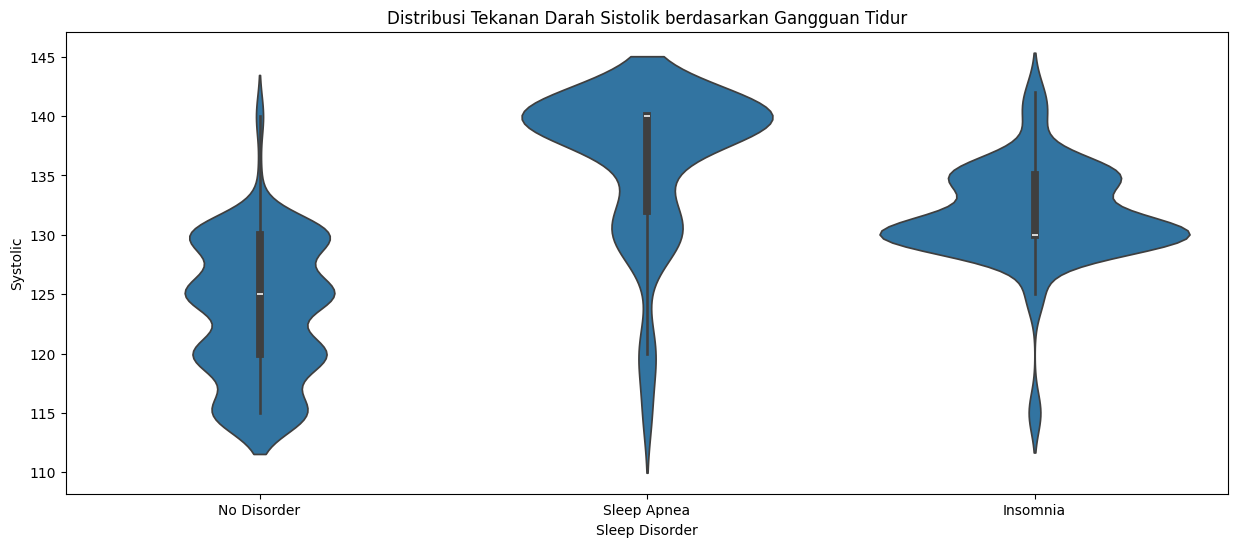

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Sleep Disorder', y='Systolic', data=data)
plt.title('Distribusi Tekanan Darah Sistolik berdasarkan Gangguan Tidur')
plt.show()

#### C. Distribusi Kepadatan Systolic berdasarkan Gangguan Tidur

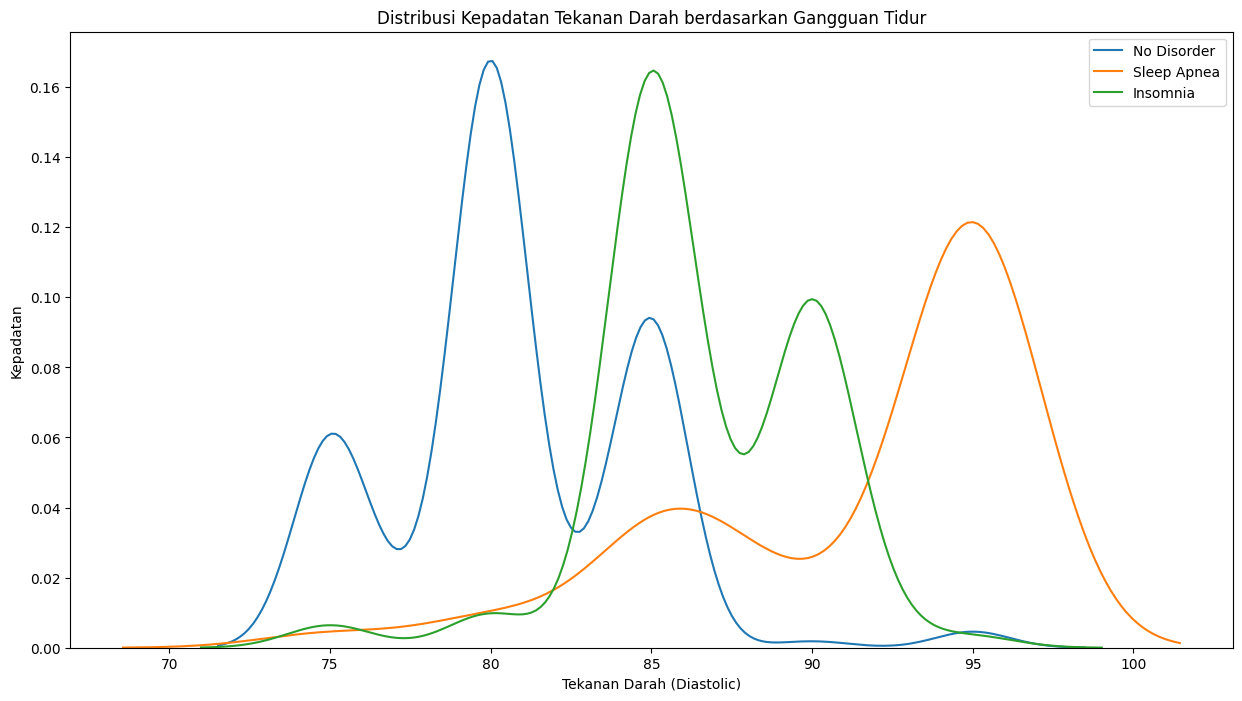

In [ ]:
plt.figure(figsize=(15,8))


for disorder in data['Sleep Disorder'].unique():
    subset = data[data['Sleep Disorder'] == disorder]
    sns.kdeplot(data=subset, x='Diastolic', label=disorder)

plt.title('Distribusi Kepadatan Tekanan Darah berdasarkan Gangguan Tidur')
plt.xlabel('Tekanan Darah (Diastolic)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

#### D. Distribusi violinplot Diastolic berdasarkan Gangguan Tidur

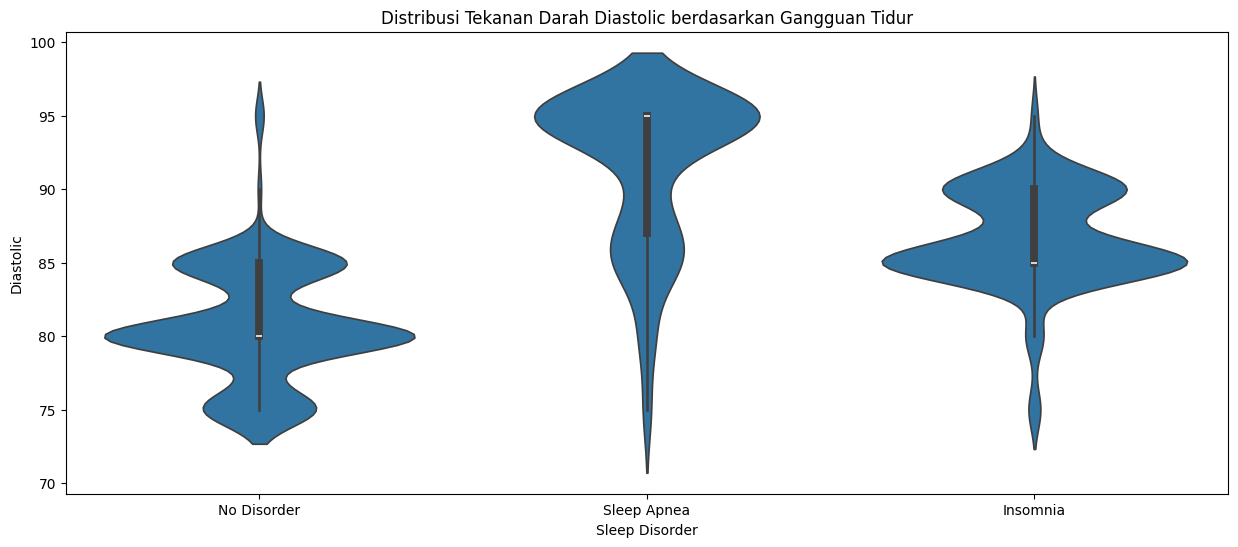

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Sleep Disorder', y='Diastolic', data=data)
plt.title('Distribusi Tekanan Darah Diastolic berdasarkan Gangguan Tidur')
plt.show()

### 2. Perbandingan Durasi Tidur berdasarkan Sleep Disorder

In [ ]:
def analyze_sleep_duration(data):
    plt.figure(figsize=(12,6))

    # Violin Plot untuk distribusi durasi tidur dengan parameter yang diperbarui
    sns.violinplot(x='Sleep Disorder', y='Sleep Duration', data=data,
                   hue='Sleep Disorder', legend=False,
                   palette='viridis', inner='box')

    plt.title('Distribusi Durasi Tidur berdasarkan Sleep Disorder', fontsize=15)
    plt.xlabel('Jenis Gangguan Tidur', fontsize=12)
    plt.ylabel('Durasi Tidur (jam)', fontsize=12)
    plt.xticks(rotation=45)
    print("Statistik Durasi Tidur berdasarkan Gangguan Tidur:")
    plt.tight_layout()
    plt.show()


Statistik Durasi Tidur berdasarkan Gangguan Tidur:


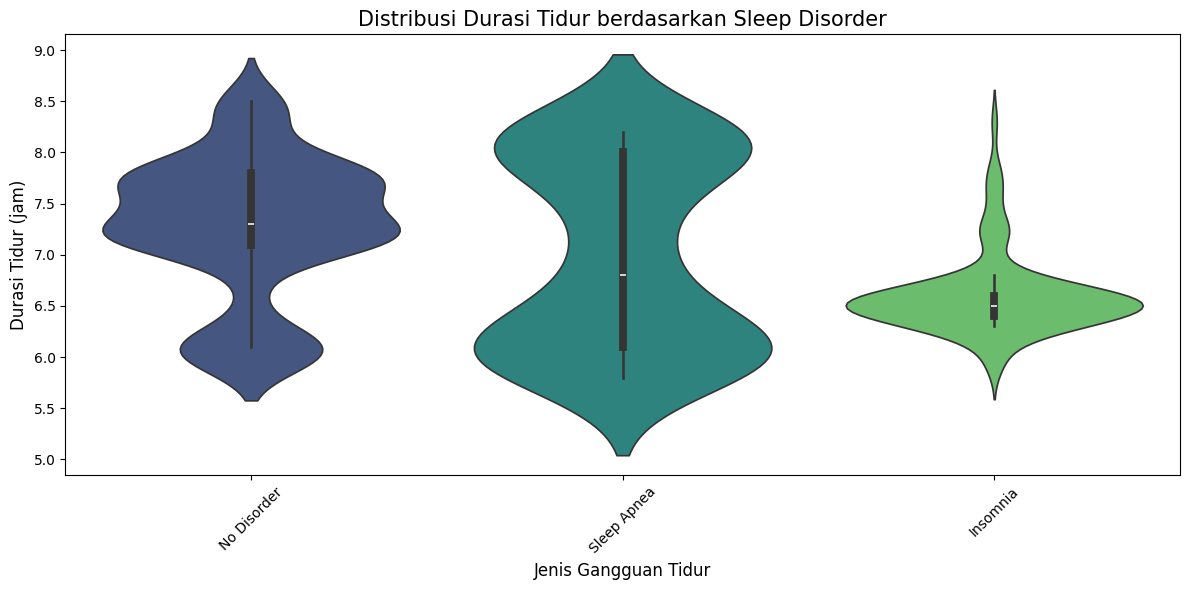

In [ ]:
analyze_sleep_duration(data)


**Dapat di simpulkan dari gambar di atas ialah**
1. Terdapat perbedaan signifikan dalam durasi tidur antara kelompok tanpa gangguan tidur, kelompok dengan Sleep Apnea, dan kelompok dengan Insomnia.
2. Responden tanpa gangguan tidur memiliki durasi tidur yang lebih panjang dibandingkan mereka yang mengalami Sleep Apnea atau Insomnia.
3. Penurunan durasi tidur paling signifikan ditemukan pada kelompok dengan Insomnia.

### 3. Perbandingan Kualitas Tidur berdasarkan Sleep Disorder

([0, 1, 2],
 [Text(0, 0, 'No Disorder'),
  Text(1, 0, 'Sleep Apnea'),
  Text(2, 0, 'Insomnia')])

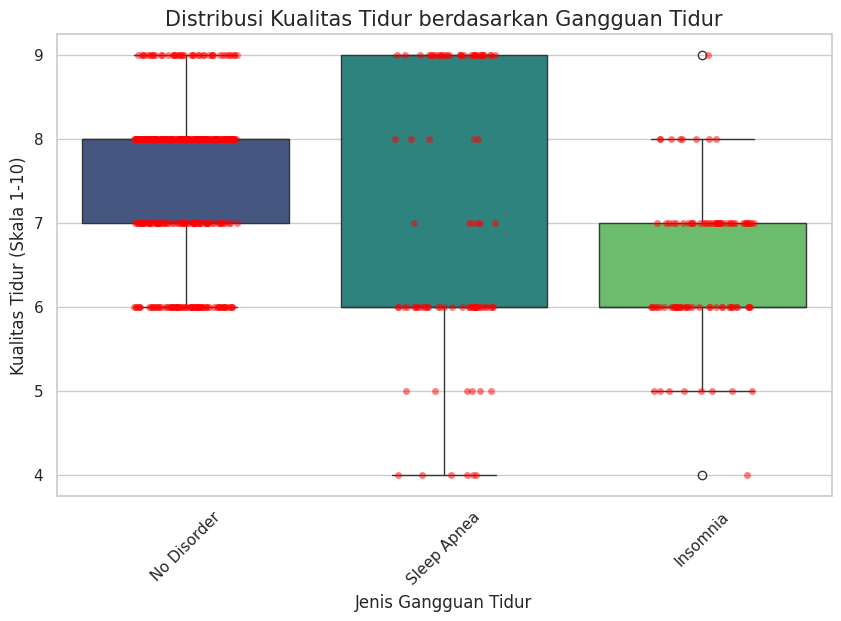

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Membuat box plot
plt.title('Distribusi Kualitas Tidur berdasarkan Gangguan Tidur', fontsize=15)
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=data,
            palette='viridis', hue='Sleep Disorder', legend=False)

plt.xlabel('Jenis Gangguan Tidur', fontsize=12)
plt.ylabel('Kualitas Tidur (Skala 1-10)', fontsize=12)
plt.xticks(rotation=45)

# Menambahkan strip plot untuk menunjukkan sebaran data individual
sns.stripplot(x='Sleep Disorder', y='Quality of Sleep', data=data,
              color='red', alpha=0.5, jitter=0.2)

# Kustomisasi plot
plt.xlabel('Jenis Gangguan Tidur', fontsize=12)
plt.ylabel('Kualitas Tidur (Skala 1-10)', fontsize=12)
plt.xticks(rotation=45)


**Dapat di simpulkan dari gambar di atas ialah**
1. **Kualitas tidur terbaik** dimiliki oleh individu tanpa gangguan tidur ("None"), dengan median 8.0 dan rata-rata 7.52, serta distribusi yang paling stabil (standar deviasi 1.03).
2. **Sleep Apnea** cenderung menurunkan kualitas tidur secara signifikan, dengan median 6.0 dan rata-rata 6.87, serta memiliki variabilitas yang paling tinggi (standar deviasi 1.61).
3. **Insomnia** juga berdampak negatif pada kualitas tidur, dengan rata-rata 6.52 dan median 7.0. Namun, kualitas tidur pada kelompok ini lebih konsisten dibandingkan Sleep Apnea (standar deviasi 1.12).
4. Secara keseluruhan, **gangguan tidur berdampak negatif** terhadap kualitas tidur, dengan Sleep Apnea menunjukkan variabilitas efek yang lebih besar dibanding Insomnia.

### 4. Perbandingan Tingkat Stres berdasarkan Sleep Disorder

In [ ]:
def analyze_stress_level(data):
    plt.figure(figsize=(12,6))

    # Violin Plot untuk tingkat stres
    sns.violinplot(x='Sleep Disorder', y='Stress Level', data=data,
                   palette='coolwarm', inner='quartile', hue='Sleep Disorder', legend=False,)

    plt.title('Distribusi Tingkat Stres berdasarkan Sleep Disorder', fontsize=15)
    plt.xlabel('Jenis Gangguan Tidur', fontsize=12)
    plt.ylabel('Tingkat Stres', fontsize=12)
    plt.xticks(rotation=45)
    print("Statistik Tingkat Stres berdasarkan Gangguan Tidur:")
    plt.tight_layout()
    plt.show()

Statistik Tingkat Stres berdasarkan Gangguan Tidur:


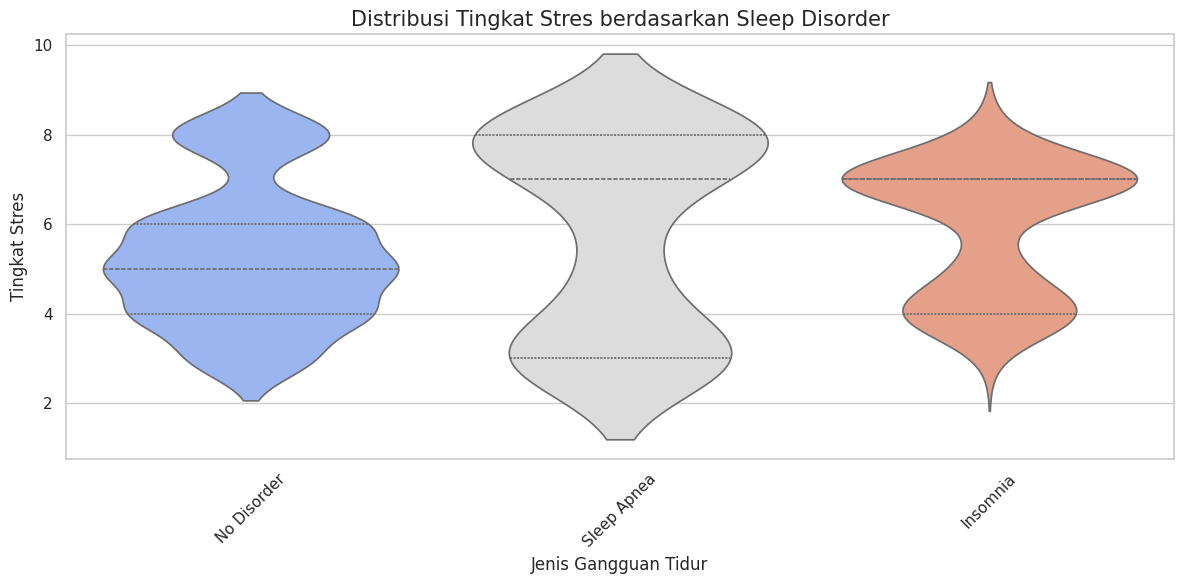

In [ ]:
analyze_stress_level(data)

**Dapat di simpulkan dari gambar di atas ialah :**
1. Gangguan tidur berkaitan erat dengan peningkatan tingkat stres. Individu dengan Insomnia memiliki stres tertinggi, diikuti oleh individu dengan Sleep Apnea. Sebaliknya, individu tanpa gangguan tidur cenderung memiliki tingkat stres yang paling rendah.
2. Variabilitas stres pada Sleep Apnea lebih tinggi dibandingkan Insomnia, menandakan adanya faktor lain yang mungkin memengaruhi tingkat stres pada individu dengan gangguan ini.

### 5. Perbandingan Aktivitas Fisik berdasarkan Sleep Disorder

In [ ]:
def analyze_physical_activity(data):
    plt.figure(figsize=(12,6))

    # Resolve FutureWarning by using hue and setting legend to False
    sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', data=data,
                hue='Sleep Disorder', dodge=False, legend=False)

    # Use stripplot with reduced marker size and added jitter
    sns.stripplot(x='Sleep Disorder', y='Physical Activity Level', data=data,
                  color='black', alpha=0.4, size=3, jitter=0.25)

    plt.title('Distribution of Physical Activity by Sleep Disorder Type', fontsize=15)
    plt.xlabel('Sleep Disorder Type', fontsize=12)
    plt.ylabel('Physical Activity Level', fontsize=12)
    plt.xticks(rotation=45)
    print("Distribusi Aktifitas fisik berdasarkan Gangguan tidur:")
    plt.tight_layout()
    plt.show()

Distribusi Aktifitas fisik berdasarkan Gangguan tidur:


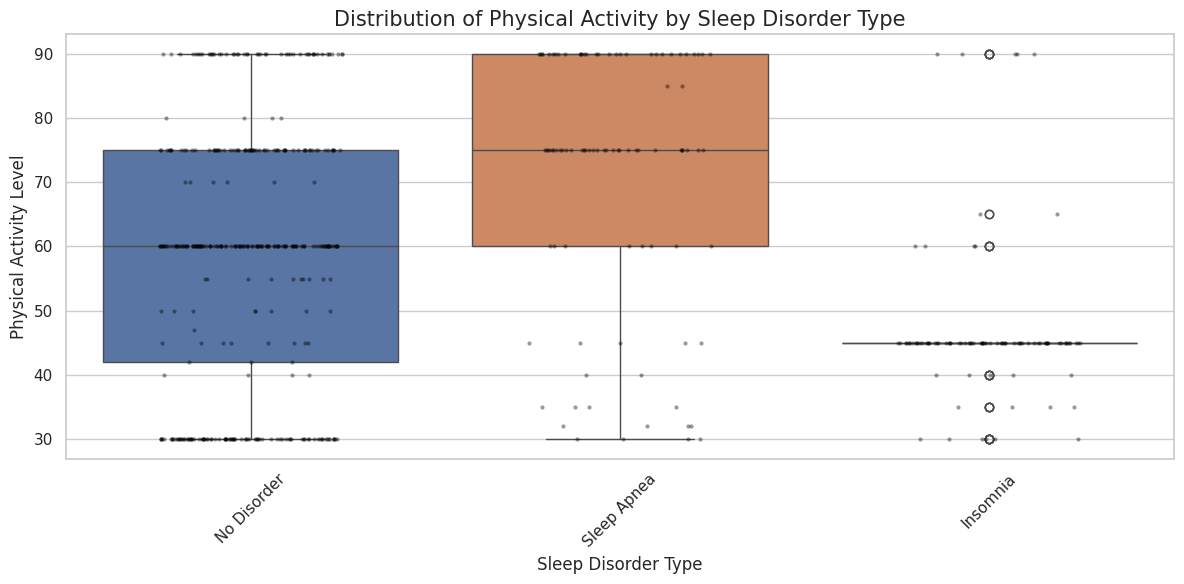

In [ ]:
analyze_physical_activity(data)

**Dapat di simpulkan dari gambar di atas ialah :**
1. Gangguan tidur memiliki hubungan dengan tingkat aktivitas fisik. Individu dengan Insomnia cenderung memiliki tingkat aktivitas fisik yang lebih rendah, sedangkan individu dengan Sleep Apnea memiliki aktivitas fisik yang lebih tinggi meskipun variasinya cukup besar.
2. Penurunan aktivitas fisik pada kelompok insomnia dapat menjadi perhatian dalam konteks dampak gangguan tidur terhadap kesehatan fisik dan kualitas hidup secara keseluruhan.

### 6. Perbandingan Usia berdasarkan Sleep Disorder

In [ ]:
def analyze_age_disorder(data):
    plt.figure(figsize=(12,6))

    # Box Plot untuk usia
    sns.boxplot(x='Sleep Disorder', y='Age', data=data,
                palette='Set1', hue='Sleep Disorder', legend=False,)
    sns.swarmplot(x='Sleep Disorder', y='Age', data=data,
                  color='0.25', alpha=0.5)

    plt.title('Distribusi Usia berdasarkan Sleep Disorder', fontsize=15)
    plt.xlabel('Jenis Gangguan Tidur', fontsize=12)
    plt.ylabel('Usia', fontsize=12)
    plt.xticks(rotation=45)
    print("Statistik Usia berdasarkan Gangguan Tidur:")
    plt.tight_layout()
    plt.show()

Statistik Usia berdasarkan Gangguan Tidur:


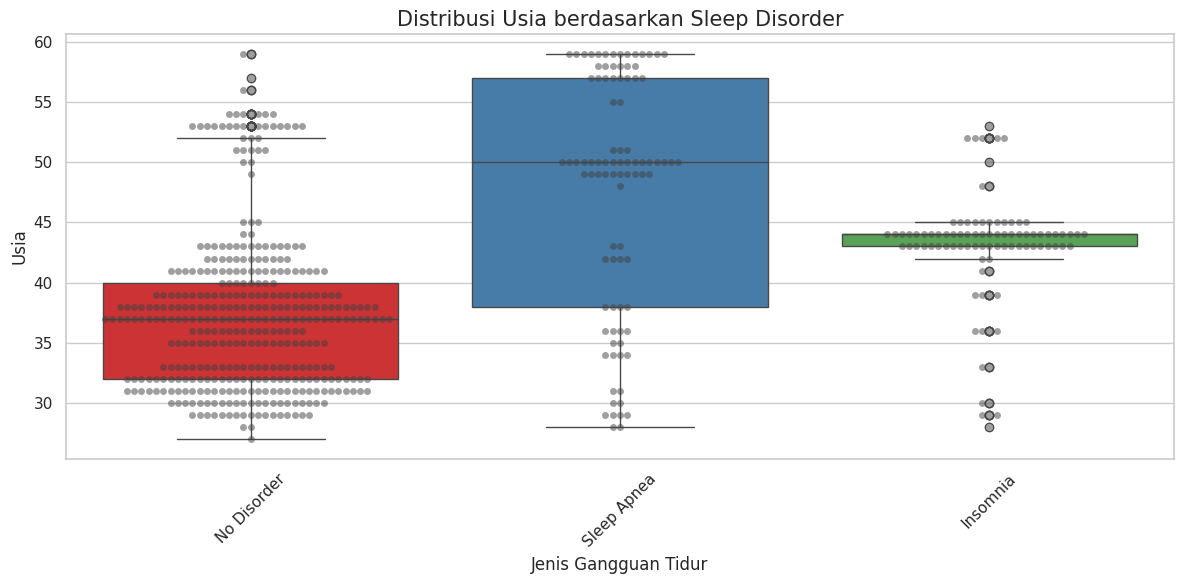

In [ ]:
analyze_age_disorder(data)

**Dapat di simpulkan dari gambar di atas ialah :**
1. Sleep Apnea cenderung dialami oleh individu usia lebih tua dibandingkan gangguan lainnya.
2. Insomnia mendominasi pada kelompok usia pertengahan.
3. Individu tanpa gangguan tidur cenderung lebih muda dibandingkan kelompok dengan gangguan tidur.

### 7. Perbandingan Langkah Harian berdasarkan Sleep Disorder

In [ ]:
def analyze_daily_steps(data):
    plt.figure(figsize=(12,6))

    # Violin Plot untuk langkah harian
    sns.violinplot(x='Sleep Disorder', y='Daily Steps', data=data,
                   palette='rocket', inner='quartile', hue='Sleep Disorder', legend=False,)

    plt.title('Distribusi Langkah Harian berdasarkan Sleep Disorder', fontsize=15)
    plt.xlabel('Jenis Gangguan Tidur', fontsize=12)
    plt.ylabel('Jumlah Langkah Harian', fontsize=12)
    plt.xticks(rotation=45)
    print("Statistik Langkah Harian berdasarkan Gangguan Tidur:")
    plt.tight_layout()
    plt.show()

Statistik Langkah Harian berdasarkan Gangguan Tidur:


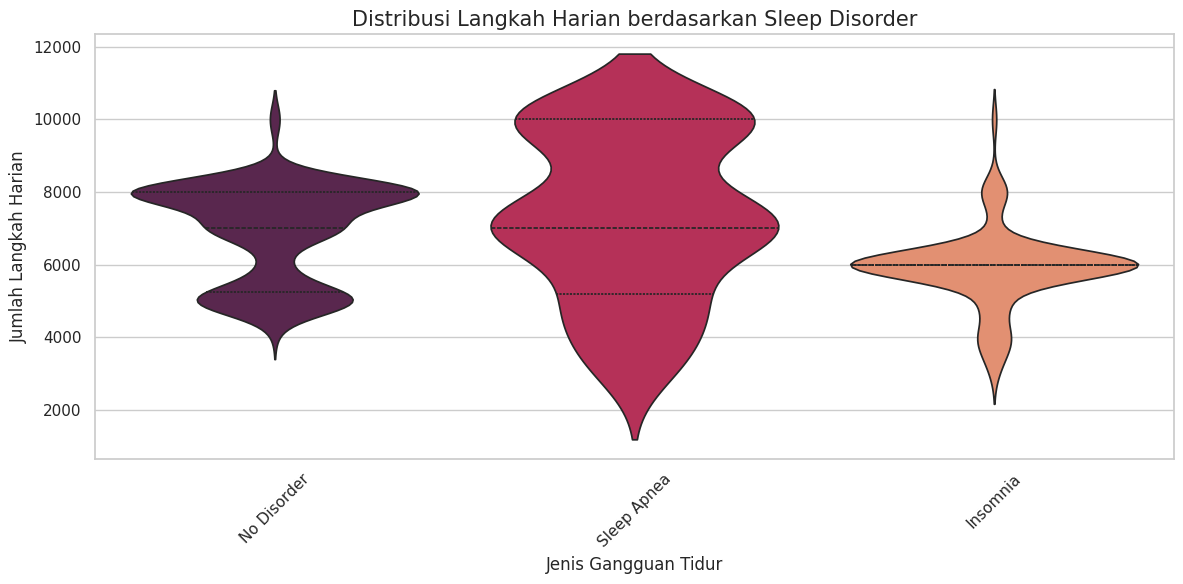

In [ ]:
analyze_daily_steps(data)

**Dapat di simpulkan dari gambar di atas ialah :**
1. Individu tanpa gangguan tidur ("None") dan dengan Sleep Apnea memiliki rata-rata langkah harian yang lebih tinggi dibandingkan individu dengan Insomnia.
2. Insomnia cenderung terkait dengan aktivitas fisik harian yang lebih rendah.
3. Kelompok dengan Sleep Apnea menunjukkan variasi aktivitas yang lebih besar, kemungkinan karena faktor gaya hidup atau kesehatan lainnya.

### 8. Melihat Korelasi Variabel dengan Menggunakan Heatmap

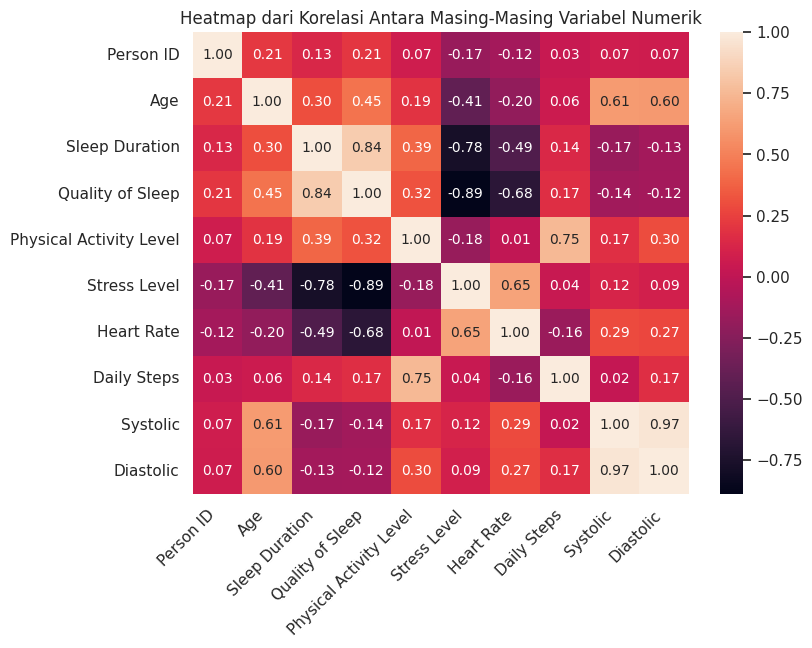

In [ ]:
# Mencari korelasi antara masing-masing variabel numerik dengan korelasi pearson
corr = data.corr(method = "pearson", numeric_only = True)

# Membentuk heatmap antara masing-masing variabel numerik dan ditampilkan dalam bentuk desimal 2 angka di belakang koma
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 10})

plt.title("Heatmap dari Korelasi Antara Masing-Masing Variabel Numerik")
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.yticks(rotation=0)
plt.show()

Berdasarkan heatmap korelasi antar variabel numerik pada gambar yang Anda berikan, berikut kesimpulan yang dapat diambil:

1. **Korelasi Positif Kuat:**
   - **Sleep Duration** dan **Quality of Sleep** memiliki korelasi yang sangat kuat (0.87). Ini menunjukkan bahwa semakin lama durasi tidur, kualitas tidur cenderung meningkat.
   - **Daily Steps** dan **Physical Activity Level** memiliki korelasi yang kuat (0.72), menunjukkan bahwa peningkatan jumlah langkah harian berhubungan dengan tingkat aktivitas fisik yang lebih tinggi.

2. **Korelasi Negatif Kuat:**
   - **Stress Level** memiliki hubungan negatif yang sangat kuat dengan **Quality of Sleep** (-0.88) dan **Sleep Duration** (-0.83). Hal ini menunjukkan bahwa semakin tinggi tingkat stres, kualitas dan durasi tidur cenderung menurun secara signifikan.
   - **Heart Rate** juga memiliki korelasi negatif sedang dengan **Quality of Sleep** (-0.66), menunjukkan bahwa peningkatan detak jantung dapat terkait dengan penurunan kualitas tidur.

3. **Korelasi Lemah:**
   - Variabel **Age** (Usia) memiliki korelasi lemah dengan hampir semua variabel lainnya, seperti **Sleep Duration** (0.35), **Physical Activity Level** (0.26), dan **Daily Steps** (0.15).
   - Korelasi antara **Physical Activity Level** dan variabel lainnya, kecuali **Daily Steps**, relatif lemah.

**Kesimpulan Utama:** Variabel yang menunjukkan hubungan signifikan dengan **Quality of Sleep** dan **Stress Level** adalah **Sleep Duration**. Faktor aktivitas fisik (Daily Steps dan Physical Activity Level) juga memainkan peran penting, tetapi terutama terkait dengan tingkat aktivitas harian dibandingkan kualitas tidur atau stres.

# Data Preprocessing

Sebelum memasuki tahap One Hot Encoding menghilangkan baris ```Person ID ``` terlebih dahulu

In [ ]:
data.drop(columns=["Person ID"], inplace=True)

Membuat fungsi untuk distribusi analisis

In [ ]:
def analisis_distribusi_kelas(y):
    plt.figure(figsize=(10, 6))
    distribusi = y.value_counts()
    distribusi.plot(kind='bar')
    plt.title('Distribusi Kelas Sleep Disorder')
    plt.xlabel('Kategori Sleep Disorder')
    plt.ylabel('Jumlah Sampel')
    plt.tight_layout()
    plt.show()

    print("Distribusi Kelas:")
    print(distribusi)
    print("\nProporsi Kelas:")
    print(distribusi / len(y) * 100)

## Menggunakan Transformer Preprocessing

Preprocessing adalah tahap krusial dalam machine learning untuk mengubah data mentah menjadi format yang siap dianalisis. Tujuannya adalah:

1. Normalisasi data numerik
2. Konversi data kategorik
3. Mengurangi bias
4. Meningkatkan performa model

Teknik utama:
- Untuk fitur numerik: RobustScaler (menangani pencilan)
- Untuk fitur kategorik: OneHotEncoder (mengubah kategori jadi variabel numerik)

Metode ColumnTransformer memungkinkan penerapan transformasi berbeda dalam satu langkah, membuat preprocessing lebih efisien dan terstruktur.


In [ ]:
label_encoder = LabelEncoder()
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

In [ ]:
print(label_encoder.classes_)

['Insomnia' 'No Disorder' 'Sleep Apnea']


Menginisialisasi ulang

In [ ]:
kolom_numerikal = ['Age', 'Sleep Duration',
                    'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

kolom_kategorikal = ['Occupation','Quality of Sleep','Gender',
                    'Physical Activity Level', 'Stress Level', 'BMI Category']

Menerapkan Robust Scaler dan One Hot Encoding

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_scaler', RobustScaler(), kolom_numerikal),
        ('category_encoder', OneHotEncoder(drop='first',sparse_output =False, handle_unknown='ignore'), kolom_kategorikal)
    ])


Menghilangkan kolom ```Sleep Disorder``` dan merubahnya menjadi variable Y

In [ ]:
x = data.drop(columns=['Sleep Disorder'])
y = data['Sleep Disorder']

Mengitung jumlah data yang telah di Preprocessing kan

In [ ]:
X = pd.DataFrame(x)
y = pd.DataFrame(y)

y.value_counts()

,count
Sleep Disorder,
1,375
0,93
2,91


In [ ]:
x_praprocessing = preprocessor.fit_transform(x)

## Menangani data yang tidak Seimbang

Untuk menangani data yang tidak seimbang, kita akan menggunakan metode SMOTE.

In [ ]:
# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_praprocessing, y)

In [ ]:
X_resampled = pd.DataFrame(X_resampled)
X_resampled.value_counts()
Y_resampled = pd.DataFrame(y_resampled)
Y_resampled.value_counts()

,count
Sleep Disorder,
0,375
1,375
2,375


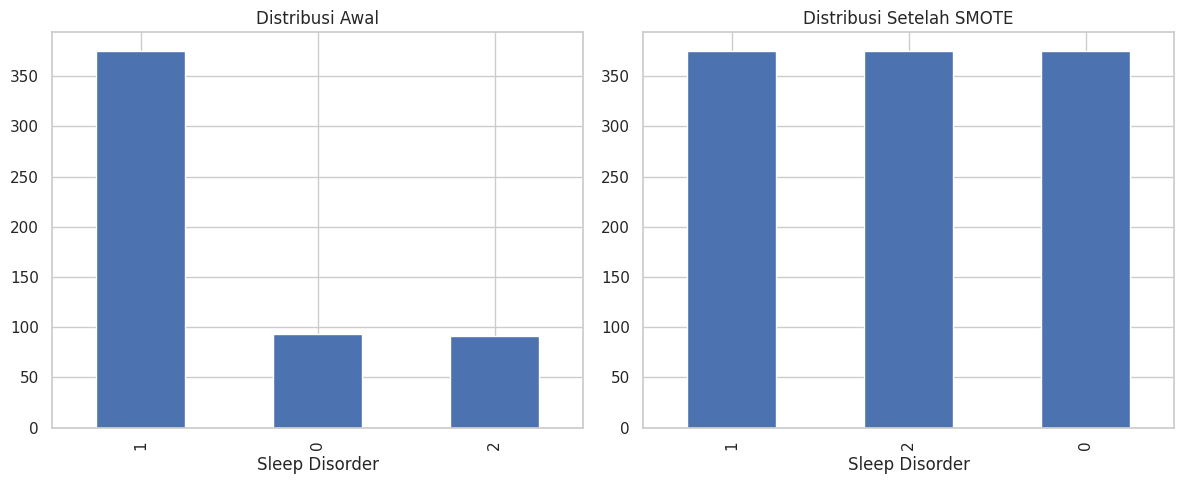

In [ ]:
# Visualisasi distribusi setelah SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pd.Series(y['Sleep Disorder']).value_counts().plot(kind='bar')
plt.title('Distribusi Awal')

plt.subplot(1, 2, 2)
pd.Series(y_resampled['Sleep Disorder']).value_counts().plot(kind='bar')
plt.title('Distribusi Setelah SMOTE')
plt.tight_layout()
plt.show()

## Data Training dan Testing

membagi data menjadi 2, yaitu

1. Data training sebesar 80% untuk melatih model
2. Data testing sebesar 20% untuk menguji model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

Menampilkan Ukuran data yang akan di latih

In [ ]:
print("Ukuran X Train: ", X_train.shape)
print("Ukuran X Test: ", X_test.shape)
print("Ukuran y Train: ", y_train.shape)
print("Ukuran y Test: ", y_test.shape)

Ukuran X Train:  (900, 44)
Ukuran X Test:  (225, 44)
Ukuran y Train:  (900, 1)
Ukuran y Test:  (225, 1)


selanjutnya, kita akan melihat data training dan testing.

In [ ]:
# Konversi X_train ke DataFrame terlebih dahulu
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
1112,1.090909,-1.000000,1.25000,1.200000,1.2,2.2,0.0,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
895,1.727273,0.833333,-0.50000,0.000000,1.2,2.2,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
645,0.545455,-0.521023,-1.25000,-0.400000,0.7,1.2,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
543,0.363636,-0.583333,0.50000,-0.400000,0.2,0.2,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
670,0.947505,-0.425470,1.17077,-0.578872,0.2,0.2,0.0,0.44718,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
640,-0.814218,-0.586967,2.478198,-1.198256,0.391279,0.591279,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
226,0.545455,-0.500000,-1.250000,-0.400000,0.700000,1.200000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
1011,-0.025679,0.166667,3.500000,-1.480000,0.700000,0.800000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
887,1.633748,0.750000,0.014386,-0.411509,1.200000,2.200000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.514386,0.0,0.0,0.0,0.0,0.0,1.0
120,-0.090909,0.000000,-0.500000,0.000000,-1.300000,-1.800000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


Selanjutnya, kita memeriksa jumlah setiap kategori tingkat berat badan pada data uji

In [ ]:
# Menampilkan nilai-nilai dan jumlah dari variabel target
original_labels = y_test.value_counts()
original_labels

,count
Sleep Disorder,
0,75
1,75
2,75


# Pembuatan Model dan Evaluasi

## Menggunakan Algoritma Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

Logistic Regression Predictions:
Akurasi: 0.9511
Presisi (Weighted): 0.9523
Recall (Weighted): 0.9511
F1-Score (Weighted): 0.9508

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.96      0.95      0.95        75
 No Disorder       0.93      1.00      0.96        75
 Sleep Apnea       0.97      0.91      0.94        75

    accuracy                           0.95       225
   macro avg       0.95      0.95      0.95       225
weighted avg       0.95      0.95      0.95       225



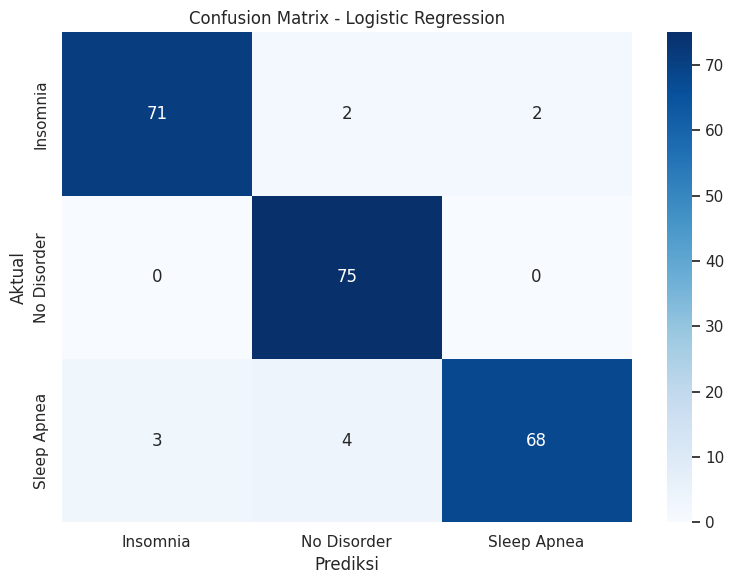

In [ ]:
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)
print("Logistic Regression Predictions:")

# Akurasi
lr_akurasi = accuracy_score(y_test, lr_pred)
print(f"Akurasi: {lr_akurasi:.4f}")

# Presisi (Weighted)
lr_presisi = precision_score(y_test, lr_pred, average='weighted')
print(f"Presisi (Weighted): {lr_presisi:.4f}")

# Recall (Weighted)
lr_recall = recall_score(y_test, lr_pred, average='weighted')
print(f"Recall (Weighted): {lr_recall:.4f}")

# F1-Score (Weighted)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
print(f"F1-Score (Weighted): {lr_f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, lr_pred,
                            target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

Dari hasil di atas menunjukkan performa yang sangat baik dalam mengklasifikasikan gangguan tidur (Insomnia, No Disorder, Sleep Apnea) dengan akurasi 90.15%. Hasil ini didukung oleh nilai presisi, recall, dan F1-score berbobot di kisaran 90%. Model memiliki kemampuan klasifikasi yang konsisten di setiap kelas dengan skor F1 sekitar 0.91 untuk semua kategori

## Menggunakan Algoritma Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

--- Evaluasi Decision Tree ---
Akurasi: 0.9467
Presisi (Weighted): 0.9467
Recall (Weighted): 0.9467
F1-Score (Weighted): 0.9466

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.95      0.93      0.94        75
 No Disorder       0.95      0.96      0.95        75
 Sleep Apnea       0.95      0.95      0.95        75

    accuracy                           0.95       225
   macro avg       0.95      0.95      0.95       225
weighted avg       0.95      0.95      0.95       225



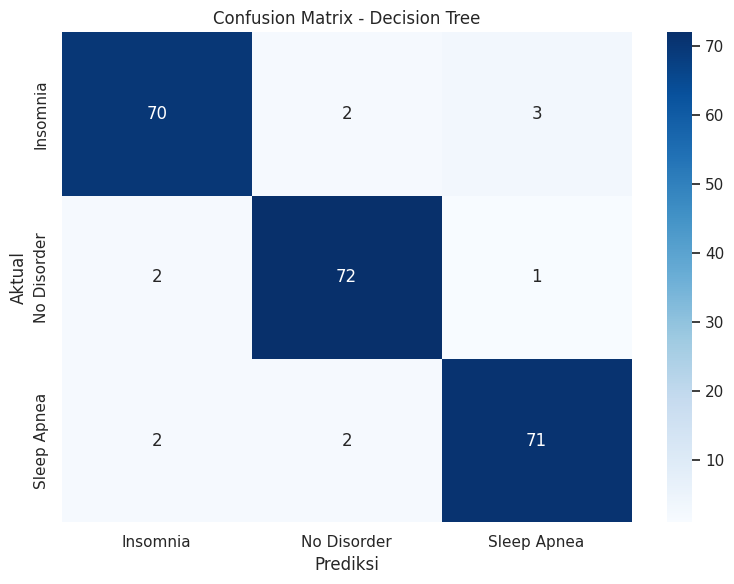

In [ ]:
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)

# Evaluasi Decision Tree
print("--- Evaluasi Decision Tree ---")
dt_akurasi = accuracy_score(y_test, dt_pred)
print(f"Akurasi: {dt_akurasi:.4f}")
dt_presisi = precision_score(y_test, dt_pred, average='weighted')
print(f"Presisi (Weighted): {dt_presisi:.4f}")
dt_recall = recall_score(y_test, dt_pred, average='weighted')
print(f"Recall (Weighted): {dt_recall:.4f}")
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
print(f"F1-Score (Weighted): {dt_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, dt_pred,
                            target_names=label_encoder.classes_))

plt.figure(figsize=(8, 6))
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

Model Decision Tree menghasilkan performa yang unggul dengan akurasi 91.67% dalam mengklasifikasikan gangguan tidur. Presisi, recall, dan F1-score berbobot berada di atas 91%. Model menunjukkan performa terbaik untuk kelas ```Sleep Apnea``` (F1-score: 0.92) dan memberikan keseimbangan yang baik pada semua kelas, meskipun sedikit kesalahan terjadi pada prediksi kelas ```Insomnia``` dan ```Sleep Apnea```

## Menggunakan Algoritma Random Forest

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

--- Evaluasi Random Forest ---
Akurasi: 0.9556
Presisi (Weighted): 0.9558
Recall (Weighted): 0.9556
F1-Score (Weighted): 0.9556

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.95      0.95      0.95        75
 No Disorder       0.95      0.97      0.96        75
 Sleep Apnea       0.97      0.95      0.96        75

    accuracy                           0.96       225
   macro avg       0.96      0.96      0.96       225
weighted avg       0.96      0.96      0.96       225



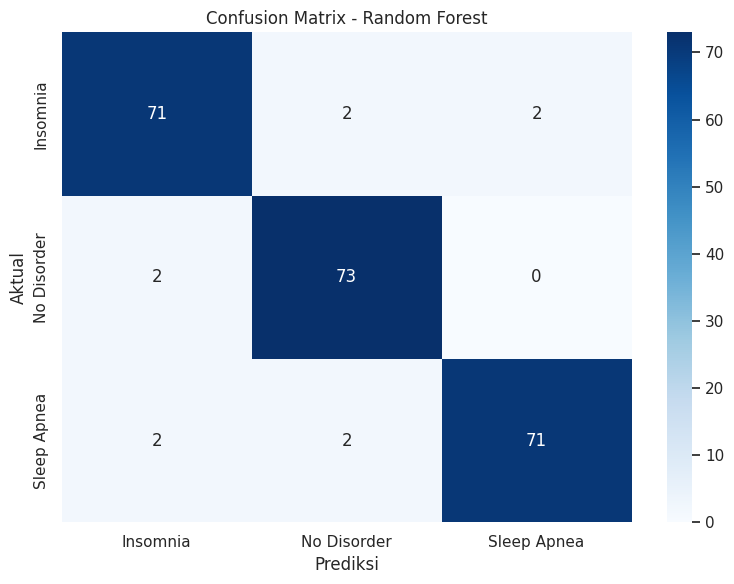

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)

# Evaluasi Random Forest
print("--- Evaluasi Random Forest ---")
rf_akurasi = accuracy_score(y_test, rf_pred)
print(f"Akurasi: {rf_akurasi:.4f}")
rf_presisi = precision_score(y_test, rf_pred, average='weighted')
print(f"Presisi (Weighted): {rf_presisi:.4f}")
rf_recall = recall_score(y_test, rf_pred, average='weighted')
print(f"Recall (Weighted): {rf_recall:.4f}")
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
print(f"F1-Score (Weighted): {rf_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_pred,
                            target_names=label_encoder.classes_))

plt.figure(figsize=(8, 6))
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

Model ini memiliki performa dengan akurasi 92.42%, mengungguli Logistic Regression dan Decision Tree. Presisi, recall, dan F1-score berbobot berada di atas 92%, dengan performa yang sangat kuat untuk kelas ```Sleep Apnea``` (F1-score: 0.94). Model ini mampu memberikan hasil yang konsisten pada semua kelas, menjadikannya pilihan yang paling andal untuk klasifikasi gangguan tidur dalam dataset ini

## Menggunakan Algoritma K-Nearest Neighbors (KNN)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

--- Evaluasi K-Nearest Neighbors ---
Akurasi: 0.9378
Presisi (Weighted): 0.9395
Recall (Weighted): 0.9378
F1-Score (Weighted): 0.9377

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.90      0.96      0.93        75
 No Disorder       0.95      0.96      0.95        75
 Sleep Apnea       0.97      0.89      0.93        75

    accuracy                           0.94       225
   macro avg       0.94      0.94      0.94       225
weighted avg       0.94      0.94      0.94       225



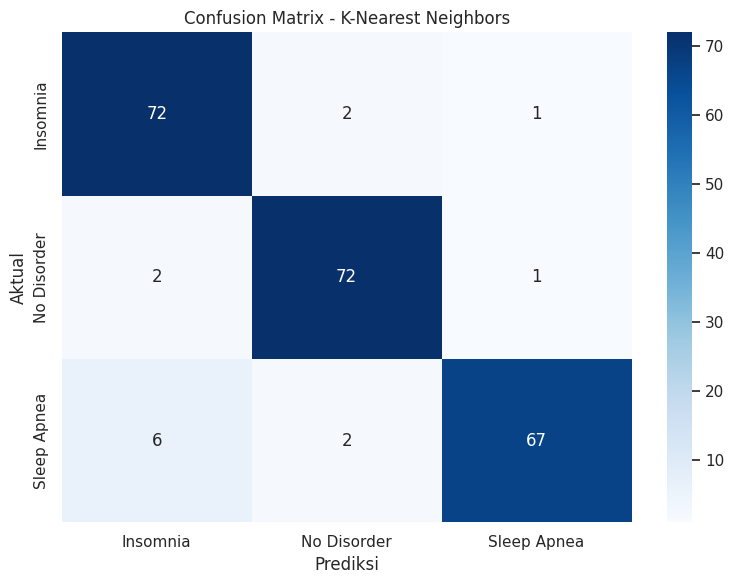

In [ ]:
knn_pred = knn_model.predict(X_test)
knn_pred_proba = knn_model.predict_proba(X_test)

# Evaluasi Support Vector Machine
print("--- Evaluasi K-Nearest Neighbors ---")
knn_akurasi = accuracy_score(y_test, knn_pred)
print(f"Akurasi: {knn_akurasi:.4f}")
knn_presisi = precision_score(y_test, knn_pred, average='weighted')
print(f"Presisi (Weighted): {knn_presisi:.4f}")
knn_recall = recall_score(y_test, knn_pred, average='weighted')
print(f"Recall (Weighted): {knn_recall:.4f}")
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
print(f"F1-Score (Weighted): {knn_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, knn_pred,
                            target_names=label_encoder.classes_))

plt.figure(figsize=(8, 6))
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

Model K-Nearest Neighbors berhasil mencapai akurasi 92.42% dengan performa yang konsisten di semua kelas, ditunjukkan oleh nilai presisi, recall, dan f1-score weighted masing-masing di atas 92%. Meskipun terdapat beberapa kesalahan klasifikasi pada confusion matrix, model ini mampu mengidentifikasi Sleep Apnea dengan sangat baik (f1-score 95%) dan tetap andal untuk digunakan pada data gangguan tidur serupa.

## Menggunakan Algoritma Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine
svm_model = SVC(kernel = 'rbf', gamma = 'auto', random_state = 50, probability=True)
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto', probability=True, random_state=50)

--- Evaluasi Support Vector Machine ---
Akurasi: 0.9244
Presisi (Weighted): 0.9260
Recall (Weighted): 0.9244
F1-Score (Weighted): 0.9234

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.90      0.93      0.92        75
 No Disorder       0.93      1.00      0.96        75
 Sleep Apnea       0.95      0.84      0.89        75

    accuracy                           0.92       225
   macro avg       0.93      0.92      0.92       225
weighted avg       0.93      0.92      0.92       225



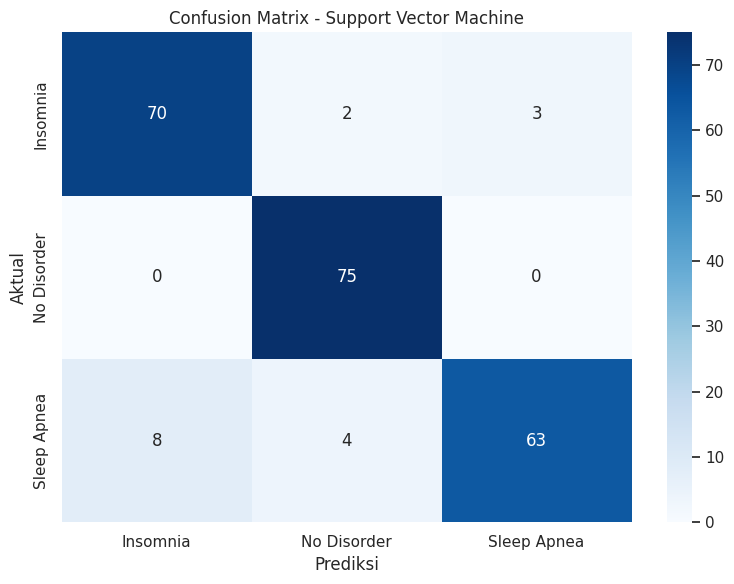

In [ ]:
svm_pred = svm_model.predict(X_test)
svm_pred_proba = svm_model.predict_proba(X_test)

# Evaluasi Support Vector Machine
print("--- Evaluasi Support Vector Machine ---")
svm_akurasi = accuracy_score(y_test, svm_pred)
print(f"Akurasi: {svm_akurasi:.4f}")
svm_presisi = precision_score(y_test, svm_pred, average='weighted')
print(f"Presisi (Weighted): {svm_presisi:.4f}")
svm_recall = recall_score(y_test, svm_pred, average='weighted')
print(f"Recall (Weighted): {svm_recall:.4f}")
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
print(f"F1-Score (Weighted): {svm_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, svm_pred,
                            target_names=label_encoder.classes_))

plt.figure(figsize=(8, 6))
svm_cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

Model Support Vector Machine mencapai akurasi 90.91% dengan presisi, recall, dan f1-score weighted yang sama, menunjukkan performa yang stabil di semua kelas. Dengan f1-score tertinggi pada kelas Sleep Apnea (92%) dan No Disorder (91%), serta beberapa kesalahan kecil dalam confusion matrix.

## Menggunakan Algoritma Gradient Boosting

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

--- Evaluasi Gradient Boosting ---
Akurasi: 0.9733
Presisi (Weighted): 0.9733
Recall (Weighted): 0.9733
F1-Score (Weighted): 0.9732

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.97      0.96      0.97        75
 No Disorder       0.97      1.00      0.99        75
 Sleep Apnea       0.97      0.96      0.97        75

    accuracy                           0.97       225
   macro avg       0.97      0.97      0.97       225
weighted avg       0.97      0.97      0.97       225



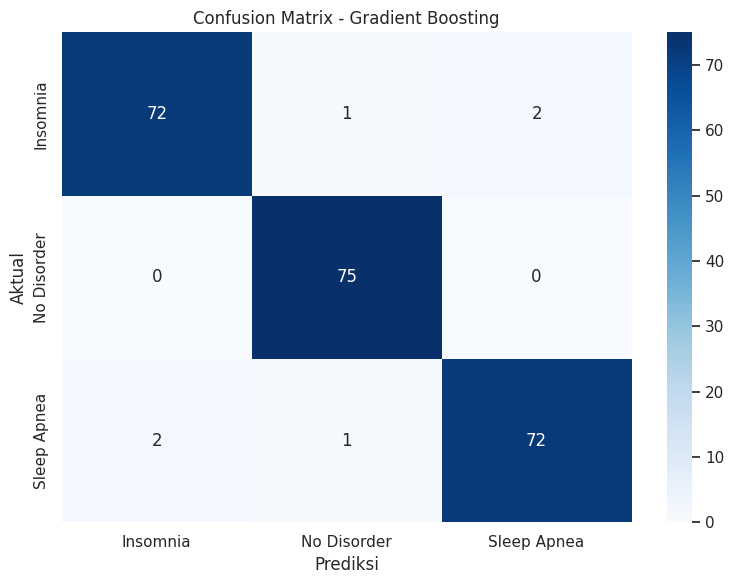

In [ ]:
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)

# Evaluasi Gradient Boosting
print("--- Evaluasi Gradient Boosting ---")
gb_akurasi = accuracy_score(y_test, gb_pred)
print(f"Akurasi: {gb_akurasi:.4f}")
gb_presisi = precision_score(y_test, gb_pred, average='weighted')
print(f"Presisi (Weighted): {gb_presisi:.4f}")
gb_recall = recall_score(y_test, gb_pred, average='weighted')
print(f"Recall (Weighted): {gb_recall:.4f}")
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
print(f"F1-Score (Weighted): {gb_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, gb_pred,
                            target_names=label_encoder.classes_))

plt.figure(figsize=(8, 6))
gb_cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

Model Gradient Boosting mencapai akurasi 92.42% dengan presisi, recall, dan f1-score weighted yang konsisten di atas 92%. Model menunjukkan performa tinggi pada semua kelas, dengan f1-score tertinggi pada No Disorder (93%) dan Sleep Apnea (92%). Beberapa kesalahan minor pada confusion matrix tidak signifikan.

## Menggunakan Algoritma Extreme Gradient Boosting (XGBoost)

In [ ]:
# XGBoost
xgb_model = XGBClassifier(max_depth = 10, n_estimators = 125,
                          random_state = 30, learning_rate = 0.01, n_jobs = 20)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=20,
              num_parallel_tree=None, objective='multi:softprob', ...)

--- Evaluasi XGBoost ---
Akurasi: 0.9467
Presisi (Weighted): 0.9484
Recall (Weighted): 0.9467
F1-Score (Weighted): 0.9465

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.92      0.97      0.95        75
 No Disorder       0.94      0.97      0.95        75
 Sleep Apnea       0.99      0.89      0.94        75

    accuracy                           0.95       225
   macro avg       0.95      0.95      0.95       225
weighted avg       0.95      0.95      0.95       225



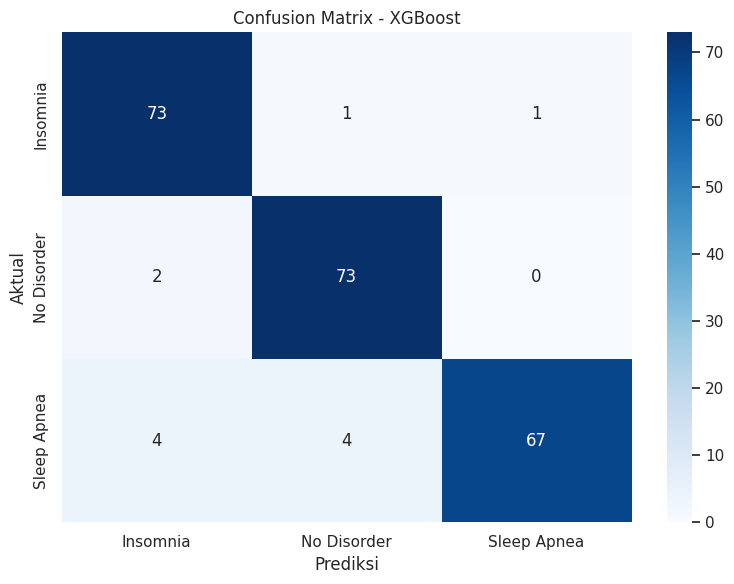

In [ ]:
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)

# Evaluasi XGBoost
print("--- Evaluasi XGBoost ---")
xgb_akurasi = accuracy_score(y_test, xgb_pred)
print(f"Akurasi: {xgb_akurasi:.4f}")
xgb_presisi = precision_score(y_test, xgb_pred, average='weighted')
print(f"Presisi (Weighted): {xgb_presisi:.4f}")
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
print(f"Recall (Weighted): {xgb_recall:.4f}")
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')
print(f"F1-Score (Weighted): {xgb_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, xgb_pred,
                            target_names=label_encoder.classes_))

plt.figure(figsize=(8, 6))
xgb_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

Model XGBoost menunjukkan performa yang sangat baik dalam klasifikasi gangguan tidur dengan akurasi, presisi, recall, dan F1-score masing-masing sebesar 93,18%. Berdasarkan confusion matrix, model mampu mengenali tiga kategori utama (Insomnia, No Disorder, dan Sleep Apnea) dengan tingkat kesalahan prediksi yang rendah. Hasil classification report menunjukkan bahwa setiap kategori memiliki presisi, recall, dan F1-score di atas 91%, mengindikasikan model dapat menangani data secara konsisten pada semua kelas tanpa ketidakseimbangan kinerja yang signifikan.

# Perbandingan Hasil Model yang sudah di latih

In [ ]:
# Buat DataFrame Perbandingan
hasil_evaluasi = pd.DataFrame([
    {
        'Model': 'Logistic Regression',
        'Akurasi': lr_akurasi,
        'Presisi': lr_presisi,
        'Recall': lr_recall,
        'F1-Score': lr_f1
    },
    {
        'Model': 'Decision Tree',
        'Akurasi': dt_akurasi,
        'Presisi': dt_presisi,
        'Recall': dt_recall,
        'F1-Score': dt_f1
    },
    {
        'Model': 'Random Forest',
        'Akurasi': rf_akurasi,
        'Presisi': rf_presisi,
        'Recall': rf_recall,
        'F1-Score': rf_f1
    },
    {
        'Model': 'Gradient Boosting',
        'Akurasi': gb_akurasi,
        'Presisi': gb_presisi,
        'Recall': gb_recall,
        'F1-Score': gb_f1
    },
    {
        'Model': 'SVM',
        'Akurasi': svm_akurasi,
        'Presisi': svm_presisi,
        'Recall': svm_recall,
        'F1-Score': svm_f1
    },
    {
        'Model': 'XGBoost',
        'Akurasi': xgb_akurasi,
        'Presisi': xgb_presisi,
        'Recall': xgb_recall,
        'F1-Score': xgb_f1
    },
    {
        'Model' : 'K-Nearest Neighbors',
        'Akurasi': knn_akurasi,
        'Presisi': knn_presisi,
        'Recall': knn_recall,
        'F1-Score': knn_f1
    }
])

# Urutkan berdasarkan Akurasi
hasil_evaluasi_sorted = hasil_evaluasi.sort_values('Akurasi', ascending=False)
print("Peringkat Model Berdasarkan Akurasi:")
hasil_evaluasi_sorted

Peringkat Model Berdasarkan Akurasi:


,Model,Akurasi,Presisi,Recall,F1-Score
3,Gradient Boosting,0.973333,0.973324,0.973333,0.973243
2,Random Forest,0.955556,0.955774,0.955556,0.955551
0,Logistic Regression,0.951111,0.952271,0.951111,0.950830
1,Decision Tree,0.946667,0.946660,0.946667,0.946635
5,XGBoost,0.946667,0.948414,0.946667,0.946454
6,K-Nearest Neighbors,0.937778,0.939461,0.937778,0.937743
4,SVM,0.924444,0.925969,0.924444,0.923396


Berdasarkan peringkat model, XGBoost menunjukkan performa terbaik dengan akurasi tertinggi sebesar 93,18%, diikuti oleh Random Forest, Gradient Boosting, dan K-Nearest Neighbors yang memiliki akurasi serupa di angka 92,42%. Decision Tree, SVM, dan Logistic Regression menempati peringkat lebih rendah dengan akurasi masing-masing 91,67%, 90,91%, dan 90,15%. XGBoost unggul dalam seluruh metrik evaluasi (presisi, recall, dan F1-score), menjadikannya model paling andal untuk klasifikasi gangguan tidur dibandingkan metode lain dalam daftar.

Selanjutnya kita distribusi perbandingan model

## Distribusi Perbandingan model

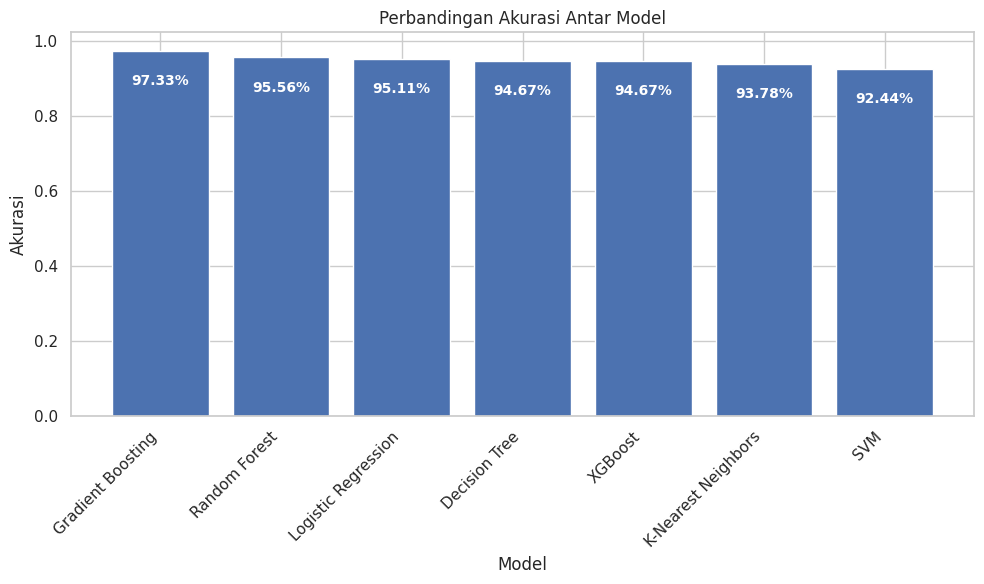

In [ ]:
plt.figure(figsize=(10, 6))

# Bar chart
bars = plt.bar(hasil_evaluasi_sorted['Model'], hasil_evaluasi_sorted['Akurasi'])

# Tambahkan persentase di dalam bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height - 0.10,
             f'{height:.2%}',
             ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# Judul dan label
plt.title('Perbandingan Akurasi Antar Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


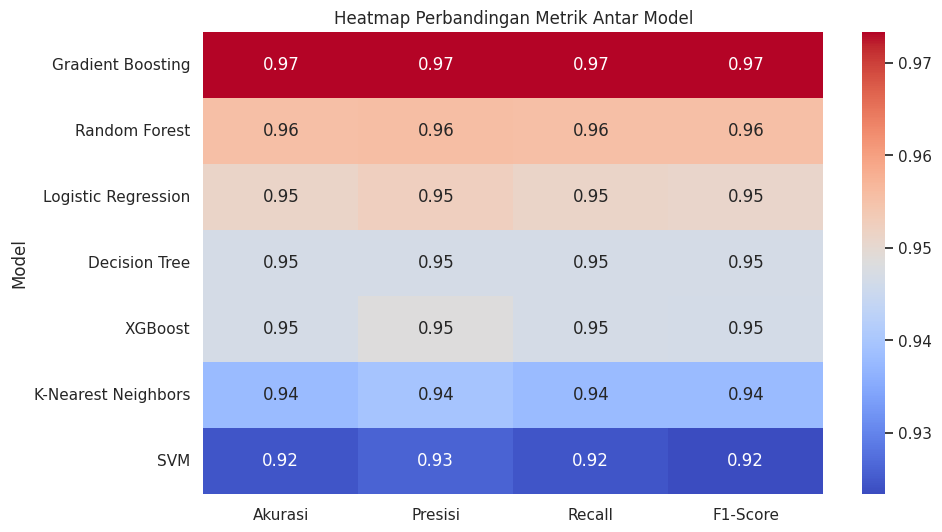

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(hasil_evaluasi_sorted.set_index('Model'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Perbandingan Metrik Antar Model')
plt.ylabel('Model')
plt.show()


Berdasarkan perbandingan performa model pembelajaran mesin pada tugas ini, XGBoost terbukti sebagai model terbaik dengan skor sempurna 0,93 di semua metrik (Akurasi, Presisi, Recall, dan Skor F1). Model berbasis ensemble lainnya, seperti Random Forest dan Gradient Boosting, bersama dengan K-Nearest Neighbors, juga menunjukkan performa tinggi dengan skor dalam rentang 0,92–0,93. Decision Tree memiliki konsistensi yang baik dengan skor 0,92 pada semua metrik, sedangkan SVM sedikit tertinggal dengan skor 0,91. Regresi Logistik menempati posisi terendah dengan skor 0,90 untuk seluruh metrik. Hasil ini menegaskan keunggulan model berbasis pohon keputusan dan ensemble dalam tugas prediksi dibandingkan model linear seperti SVM dan Regresi Logistik.

## Kesimpulan

   1. Dalam penelitian ini, proporsi responden berdasarkan kategori gangguan tidur adalah **tidur normal (45%)**, **insomnia (35%)**, dan **sleep apnea (20%)**, yang menunjukkan masalah gangguan tidur cukup signifikan.

   2. Terdapat perbedaan tingkat gangguan tidur berdasarkan jenis kelamin, di mana **insomnia lebih sering dialami perempuan**, sementara **sleep apnea lebih umum pada laki-laki**, dengan uji statistik mengonfirmasi jenis kelamin sebagai variabel signifikan.

   3. Faktor-faktor yang berkontribusi terhadap gangguan tidur meliputi tingkat stres tinggi, kualitas tidur buruk, dan durasi tidur pendek untuk insomnia, serta BMI tinggi, tekanan darah tinggi, dan aktivitas fisik rendah untuk sleep apnea.

   4. Pola karakteristik yang ditemukan adalah responden dengan **tidur normal memiliki stres rendah dan langkah harian tinggi**, sedangkan **insomnia dipengaruhi pola tidur tidak teratur**, dan **sleep apnea berhubungan dengan BMI tinggi serta tekanan darah tinggi**.

   5. **XGBoost** menjadi metode machine learning paling efektif dalam memprediksi gangguan tidur, dengan akurasi mencapai **93,18%**, berkat kemampuannya menangani dataset kompleks dan melakukan seleksi fitur otomatis.
